# DSM010 Big Data - CW2

## Introduction

> Italy is facing the worst drought of the last 70 years. For weeks, the water level of the river Po, the country’s main river system, has been so low in some areas that old shipwrecks are resurfacing. - _Nature_ [[1]](#References) 

> France drought: Parched towns left short of drinking water. The French government has set up a crisis team to tackle a historic drought that has left more than 100 municipalities short of drinking water. _BBC_ [[2]](#References) 

> Europe battles water shortages as severe drought sweeps the continent. An unusually dry winter and spring followed by a summer of baking heat are part of an overall warming trend. _Financial Times_ [[3]](#References) 

These are just few of the headlines that are crowding newspapers and TV news these days. According to the 2021 Global Climate Report from NOAA National Centers for Environmental Information, every month of 2021 was warmer than average, despite the cooling influence from the La Niña climate pattern in the tropical Pacific. The nine years from 2013 through 2021 rank among the 10 warmest years on record. [[4]](#References) 

Altough the global warming has not been uniform around the globe, it shows a general upwarding trend; we can affirm that Earth’s temperature has risen by 0.14° Fahrenheit (0.08° Celsius) per decade since 1880, but the rate of warming since 1981 is more than twice that: 0.32° F (0.18° C) per decade. [[4]](#References) Climate change is causing extra heat that is driving regional and seasonal temperature extremes, reducing snow cover and sea ice, intensifying heavy rainfall, and changing habitat ranges for plants and animals. Along with these changes we are witnessing the worst droughts in years in various countries, not only in Europe, but all around the world.

Being the drought crysis so alarming and something that will be at the center of the agenda of the most of the countries for the furture to come, we decided to investingate if we can possibly predict drought in some areas given meteorological and soil data.

## The Data

Given the big data context of this course, I looked for datasets that were huge enough and that also contained useful and interesting information. The dataset has been collected from [Predict Droughts using Weather & Soil Data](https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data) on Kaggle, but the original source is the [NASA Power Project](https://power.larc.nasa.gov/) website, that makes available useful data by using their satellite technology.

The dataset comes already splitted in 3 parts, and is presented as follows:
* Training set, from 2000 to 2017, 19300680 entries, 21 features
* Test set, from 2017 to 2019, 2271948 entries, 21 features
* Validation set, from 2019 to 2020, 2268840, 21 features

Speaking about the features it can be schematized as follows:

| Indicator   	| Description                           	| Type   	| 
|-------------	|---------------------------------------	|--------	|
| WS10M_MIN   	| Minimum Wind Speed at 10 Meters (m/s) 	| double 	| 
| QV2M        	| Specific Humidity at 2 Meters (g/kg)  	| double       	| 
| T2M_RANGE   	| Temperature Range at 2 Meters (C)     	| double       	|
| T2M         	| Temperature at 2 Meters (C)         	    | double       	|  
| WS50M_MIN   	| Minimum Wind Speed at 50 Meters           | double       	| 
| T2M_MAX     	| Maximum Temperature at 2 Meters (C)   	| double       	|
| WS50M       	| Wind Speed at 50 Meters (m/s)         	| double       	|
| TS          	| Earth Skin Temperature (C)            	| double       	|
| WS50M_RANGE 	| Wind Speed Range at 50 Meters (m/s)   	| double       	|
| WS50M_MAX   	| Maximum Wind Speed at 50 Meters (m/s) 	| double       	| 
| WS10M_MAX   	| Maximum Wind Speed at 10 Meters (m/s) 	| double       	| 
| WS10M_RANGE 	| Wind Speed Range at 10 Meters (m/s)   	| double       	|
| PS          	| Surface Pressure (kPa)                	| double       	| 
| T2MDEW      	| Dew/Frost Point at 2 Meters (C)       	| double       	| 
| T2M_MIN      	| Minimum Temperature at 2 Meters (C)     	| double       	|
| T2MWET    	| Wet Bulb Temperature at 2 Meters (C)     	| double       	|
| PRECTOT      	| Precipitation (mm/day)      	| double       	|
| fips        	| US county FIPS code                    	| int       	| 
| date        	| observation date                      	| string       	| 
| score       	| Drought level                           	| double       	|

Our target is the drought level feature, that could be schematized as follows [[4]](#references):

![Drought Levels](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2055480%2Ff5ad8544ab11d043972fb9209a874dd3%2Flevels.PNG?generation=1611148560535086&alt=media)

Also, later in the analysis, more data has been added from [The US Drought Monitor](https://droughtmonitor.unl.edu/), giving the possibility to estimate the soil impact on the different drought levels. The dataset, with 3019 entries and 31 features, is structured as follows:

| Indicator     	| Description                                                                                                	|
|---------------	|------------------------------------------------------------------------------------------------------------	|
| Latitude      	| Minimum Wind Speed at 10 Meters (m/s)                                                                      	|
| Longitude     	| Specific Humidity at 2 Meters (g/kg)                                                                       	|
| Elevation     	| Median Elevation (meters)                                                                                  	|
| slope1        	| 0 % ≤ slope ≤ 0.5 %                                                                                        	|
| slope2        	| 0.5 % ≤ slope ≤ 2 %                                                                                        	|
| slope3        	| 2 % ≤ slope ≤ 5 %                                                                                          	|
| slope4        	| 5 % ≤ slope ≤ 10 %                                                                                         	|
| slope5        	| 10 % ≤ slope ≤ 15 %                                                                                        	|
| slope6        	| 15 % ≤ slope ≤ 30 %                                                                                        	|
| slope7        	| 30 % ≤ slope ≤ 45 %                                                                                        	|
| slope8        	| Slope > 45 %                                                                                               	|
| aspectN       	| North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚                                                               	|
| aspectE       	| East: 45˚ < aspect ≤ 135˚                                                                                  	|
| aspectS       	| South: 135˚ < aspect ≤ 225˚                                                                                	|
| aspectW       	| West: 225˚ < aspect ≤ 315˚                                                                                 	|
| aspectUnknown 	| Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope 	|
| WAT_LAND      	| mapped water bodies                                                                                        	|
| NVG_LAND      	| barren/very sparsely vegetated land                                                                        	|
| URB_LAND      	| built-up land (residential and infrastructure)                                                             	|
| GRS_LAND      	| grass/scrub/woodland                                                                                       	|
| FOR_LAND      	| forest land, calibrated to FRA2000 land statistics                                                         	|
| CULTRF_LAND   	|                                                                                                            	|
| CULTIR_LAND   	| irrigated cultivated land, according to GMIA 4.0                                                           	|
| CULT_LAND     	| total cultivated land                                                                                      	|
| SQ1           	| Nutrient availability                                                                                      	|
| SQ2           	| Nutrient retention capacity                                                                                	|
| SQ3           	| Rooting conditions                                                                                         	|
| SQ4           	| Oxygen availability to roots                                                                               	|
| SQ5           	| Excess salts.                                                                                              	|
| SQ6           	| Toxicity                                                                                                   	|
| SQ7           	| Workability (constraining field management)                                                                	|
|               	|                                                                                                            	|

Finally the total amount of disk space needed for our datasets is of ~ 3.5 Gb.

### Framig the Problem and Looking at the Big Picture

First of all let's define what is drought. According to the National Drought Mitigation Center, there is no single definition for drought. When a drought begins and ends is difficult to determine. Rainfall data alone won't tell you if you are in a drought, how severe your drought may be, or how long you have been in drought. We can, however, identify various indicators of drought, such as rainfall, snowpack, streamflow, and more, and track these indicators to monitor drought. [[5]](#references) Also, according to NASA, droughts are caused by low precipitation over an extended period of time. Atmospheric conditions such as climate change, ocean temperatures, changes in the jet stream, and changes in the local landscape are all factors that contribute to drought. [[6]](#references) We can add to the cause of drought also land and water temperatures, soil moisture levels [[7]](#references) and deforestation [[8]](#references). From these statements we can affrim that even if rain is an important factor, it need to be contestualized and correlated with all the others factors and time. Also having data about ocean temperatures or jet streams could be beneficial.

Furthermore, we need to frame our objective: we want to try to predict different drought levels given our data from meteorological relevations and soil specifications. Since we have our target already labeled, the problem can be presented as a multiclass supervised learning problem. As we will see later, data is higly imbalanced, so the classic performance measures (accuracy, precision, recall) won't be so much informative without context. Instead we will mostly evaluate our best model based on the weighted F1-score, more indicated for evaluating imbalanced datasets, and the weighted false positive rate. 

Speaking about the models that we will consider, we need to underline how not all of them are suitable for multiclass classification. Amongst the siutables models we decided to use 3 of them: Decision Tree, Random Forest and OneVsRest with Logistic regression.

The study will be structured as follow:
1. Importing the Data
2. Exploring the data:
    1. Dwonsampling for an easier manipulation
    2. Univariate Analysis of the features
    3. Bivariate Analysis
    4. Adding more useful data
    5. Correlation
    6. Conclusions and action to undertake
3. Preparing the data:
    * Feature engineering
    * Removing features
    * Transforming the features
4. Model Building
5. Hyperparamenter tuning
6. Conclusioins and improvements



## Importing Libraries and Initialising Spark

In [1]:
# !pip install seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import random
random.seed(0)
np.random.seed(0)
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.mllib.stat import Statistics
from pyspark.sql.types import FloatType, IntegerType
from pyspark.ml.pipeline import Transformer, Pipeline
import pyspark.ml.feature as ft
# import pyspark.ml.classification as cl
from pyspark.ml.feature import PCA
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, OneVsRest, RandomForestClassifier
# import pyspark.ml.tuning as tune
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit, CrossValidator

In [2]:
# list of packages used for this analysis
# !pip freeze

In [3]:
#Spark Configuration
# memory increased to avoid memory space problems
spark = SparkSession.builder \
    .config("spark.driver.memory", "15g") \
    .config("spark.executor.memory", "7g") \
    .appName('CW2') \
    .getOrCreate()

spark

## Getting the Data

1. Data is stored on: `hdfs://lena-master/user/mgarg001/CW2/`
2. Check the type of data (eg time series etc)
3. Source: https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data

### Importing the Data

In [5]:
train_path = "hdfs://lena-master/user/mgarg001/CW2/train_timeseries.csv"
test_path = "hdfs://lena-master/user/mgarg001/CW2/test_timeseries.csv"
val_path = "hdfs://lena-master/user/mgarg001/CW2/validation_timeseries.csv"

In [6]:
# Loading the data
train_df = spark.read.csv(train_path, header=True, inferSchema=True)
test_df = spark.read.csv(test_path, header=True, inferSchema=True)
val_df = spark.read.csv(val_path, header=True, inferSchema=True)

In [7]:
#checking schema
train_df.printSchema()

root
 |-- fips: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- PRECTOT: double (nullable = true)
 |-- PS: double (nullable = true)
 |-- QV2M: double (nullable = true)
 |-- T2M: double (nullable = true)
 |-- T2MDEW: double (nullable = true)
 |-- T2MWET: double (nullable = true)
 |-- T2M_MAX: double (nullable = true)
 |-- T2M_MIN: double (nullable = true)
 |-- T2M_RANGE: double (nullable = true)
 |-- TS: double (nullable = true)
 |-- WS10M: double (nullable = true)
 |-- WS10M_MAX: double (nullable = true)
 |-- WS10M_MIN: double (nullable = true)
 |-- WS10M_RANGE: double (nullable = true)
 |-- WS50M: double (nullable = true)
 |-- WS50M_MAX: double (nullable = true)
 |-- WS50M_MIN: double (nullable = true)
 |-- WS50M_RANGE: double (nullable = true)
 |-- score: double (nullable = true)



In [8]:
print("train shape:", (train_df.count(), len(train_df.columns)))
print("test shape:", (test_df.count(), len(test_df.columns)))
print("valid shape:", (val_df.count(), len(val_df.columns)))

train shape: (19300680, 21)
test shape: (2271948, 21)
valid shape: (2268840, 21)


## Explore the Data

1. Create a copy of the dataframes
2. Studying attributes
    1. Check missing values
    2. Check data noise
    3. Usefulness for the task
    4. Type of distribuition
3. Indentify the target
5. Visualize the data
6. Study the correlation between the data
7. Experiment with attribute combinations
8. Is extra data useful?
9. Document learnings

### Creating a copy of the Dataframe

In [9]:
train = train_df.alias('train')
test = test_df.alias('test')
val = val_df.alias('val')
train == train_df #checking if copy is equal to original df
train.cache()

DataFrame[fips: int, date: string, PRECTOT: double, PS: double, QV2M: double, T2M: double, T2MDEW: double, T2MWET: double, T2M_MAX: double, T2M_MIN: double, T2M_RANGE: double, TS: double, WS10M: double, WS10M_MAX: double, WS10M_MIN: double, WS10M_RANGE: double, WS50M: double, WS50M_MAX: double, WS50M_MIN: double, WS50M_RANGE: double, score: double]

Before going ahead, since we are delaing with a large number of entries, it would be ideal to sample our dataset for data exploration. We will start from the bottom and will asses the structure of our target and understande if a random sample is suitable or if a stratification is needed.

#### Target Study

The target feature of this dataset is the drought score. It goes froma level of 0 to a level of 4.
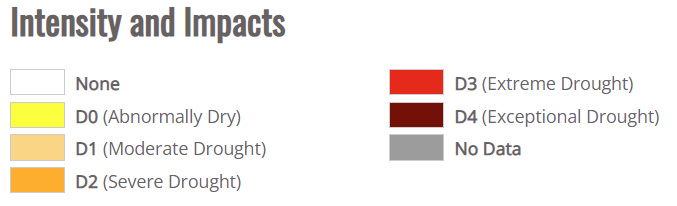

The target is divided in 5 classes, plus missing data and none values. As presented, our first arrpoach would be to try to predict different levels of drought.

In [10]:
# let's change the data type for "date" and "score". The latter is necessary to correctly grouping
train = train.withColumn('score', F.col('score').cast("integer")).withColumn('date', F.to_date(F.col('date')))
test = test.withColumn('score', F.col('score').cast("integer")).withColumn('date', F.to_date(F.col('date')))
val = val.withColumn('score', F.col('score').cast("integer")).withColumn('date', F.to_date(F.col('date')))

In [11]:
#let's visualize the amount of entries for each score
target = train.groupBy("score").count()
tot = int(train.count())

plot_data = target.withColumn("percentage",(F.col("count")/tot)*100).sort(target.score.desc()).toPandas()

In [12]:
plot_data

score     count  percentage
0    5.0     21806    0.112980
1    4.0     80970    0.419519
2    3.0    169049    0.875871
3    2.0    265995    1.378164
4    1.0    424346    2.198606
5    0.0   1794630    9.298273
6    NaN  16543884   85.716586

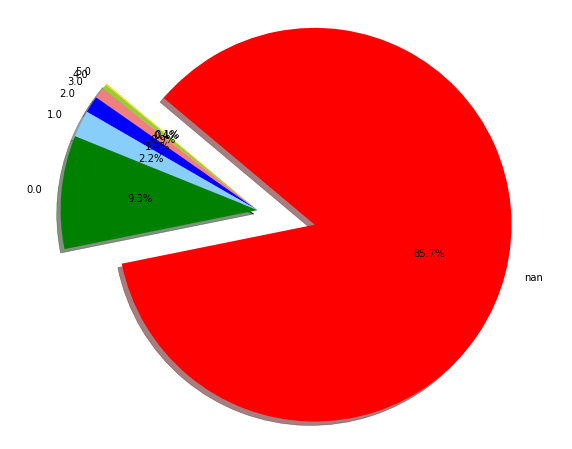

In [13]:
# Data to plot 
labels = plot_data.score
sizes = plot_data.percentage
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0, 0, 0, 0,0,0,0.3) # explode 1st slice
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

It seems that the score data is highly imbalanced. We have an high amout of Nan values. We will investigate this further later, and for the moment we will stratify our data accordingly for data exploration. Let's visualize the distribuition of the target without Nan values.

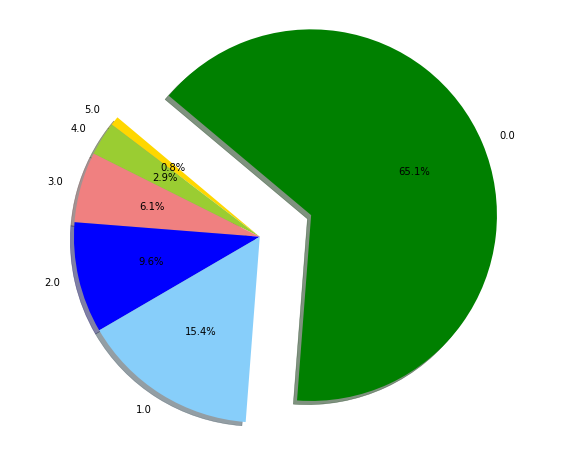

In [14]:
labels = plot_data.score.dropna()
sizes = plot_data.percentage[:-1]
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green']
explode = (0, 0, 0,0,0,0.3) # explode 1st slice
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The zero label (abnormally dry), constitues more than 65% of the target minus the None values, while the highest level of drought constitutes only 0,8%. There are different approaches to tackle target imbalance:
1. Downsampling/Upsampling/SMOTE (Synthetic Minority Oversampling Technique): These techniques permit to either change the dataset accordingly so that all the classes have the same amount of entries. Given the large amout of entries, downsampling could be a solution, but we could loose precious data.
2. Create e new feature with the different targets weight scores: even if not all the models use "weight" as hyperparameter for imbalanced datasets, the evaluation class for multiclass problems permits the use of a weight column.
3. Group the minority classes (1,2,3,4,5) into one unique label representing drought while the zero class still represent abnormally dry situation. This would split our target into a 65-45% imbalance - quite more manageable.


In [15]:
# Substituting -1 to Nans to perform sampleBy
train_df_na = train_df.fillna(-1)
#changing data types
train_df_na = train_df_na.withColumn('score', F.col('score').cast("integer")).withColumn('date', F.to_date(F.col('date')))
# stratified sampling
#Please note that the fraction provided to sampleBy for DataFrames, as with 'sampleByKeyExact' and sampleByKey for RDD's, is not the percentage you want in the end result set. 
#Rather it's the percentage you wish to keep from the original dataset. 
#https://stackoverflow.com/questions/40872694/sampleby-returns-very-skewed-results#40872744
train = train_df_na.sampleBy("score", fractions={0: 0.016, 1: 0.016, 2: 0.016, 3: 0.016, 4: 0.016, 5: 0.016, -1: 0.016}, seed=0) #~10%

In [16]:
target = train.select(train.score).groupBy("score").count()

tot = int(train.count())

plot_data = target.withColumn("percentage",(F.col("count")/tot)*100).sort(target.score.desc()).toPandas()

In [17]:
plot_data

score   count  percentage
0      5     357    0.115723
1      4    1209    0.391903
2      3    2693    0.872948
3      2    4236    1.373118
4      1    6880    2.230182
5      0   29073    9.424140
6     -1  264047   85.591987

As we can see label stratification is preserved.

In [18]:
# map back -1 to None
mapping = {
    -1: None,
    0: 1,
    1: 2,
    2: 3,
    3: 4,
    4: 5,
}

train = train.withColumn("score", F.col("score")).replace(to_replace=mapping, subset=["score"])

In [19]:
train_sub = train.toPandas()

In [20]:
train_sub.shape

(308495, 21)

That's around 1.6% of our original data.

## Data Exploration

### Studying Attributes

| Indicator   	| Description                           	| Type   	| Comment 	|
|-------------	|---------------------------------------	|--------	|---------	|
| WS10M_MIN   	| Minimum Wind Speed at 10 Meters (m/s) 	| double 	|         	|
| QV2M        	| Specific Humidity at 2 Meters (g/kg)  	| double       	|         	|
| T2M_RANGE   	| Temperature Range at 2 Meters (C)     	| double       	| Checki collinearity with T2M features         	|
| T2M         	| Temperature at 2 Meters (C)         	| double       	|         	|
| WS50M_MIN   	| Minimum Wind Speed at 50 Meters           	| double       	|         	|
| T2M_MAX     	| Maximum Temperature at 2 Meters (C)   	| double       	|         	|
| WS50M       	| Wind Speed at 50 Meters (m/s)         	| double       	|         	|
| TS          	| Earth Skin Temperature (C)            	| double       	|         	|
| WS50M_RANGE 	| Wind Speed Range at 50 Meters (m/s)   	| double       	|Check collinearity with WS50M features         	|
| WS50M_MAX   	| Maximum Wind Speed at 50 Meters (m/s) 	| double       	|         	|
| WS10M_MAX   	| Maximum Wind Speed at 10 Meters (m/s) 	| double       	|         	|
| WS10M_RANGE 	| Wind Speed Range at 10 Meters (m/s)   	| double       	|Check collinearity with WS10M features         	|
| PS          	| Surface Pressure (kPa)                	| double       	|         	|
| T2MDEW      	| Dew/Frost Point at 2 Meters (C)       	| double       	|Might be related to T2MWET         	|
| T2M_MIN      	| Minimum Temperature at 2 Meters (C)     	| double       	|         	|
| T2MWET    	| Wet Bulb Temperature at 2 Meters (C)     	| double       	|         	|
| PRECTOT      	| Precipitation (mm/day)      	| double       	|Might have been useful to have mm/h which is the standard measure for precipitations         	|
| fips        	| US county FIPS code                    	| int       	| More info at: https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697        	|
| date        	| observation date                      	| string       	| to be changed to datetime        	|
| score       	| Drought level                           	| double       	| to be changes to int, categorical (ordinal) feature based on levels from 0 to 5        	|

#### Checking missing values

In [21]:
# SPARK IMPLEMENTATION
# missings = train.agg(*[
#  (1 - (F.count(c) / F.count('*'))).alias(c + '_missing')
#  for c in train_df.columns
# ]).toPandas().T*100

# missings.columns = ["missing %"]
# missings

In [22]:
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308495 entries, 0 to 308494
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         308495 non-null  int32  
 1   date         308495 non-null  object 
 2   PRECTOT      308495 non-null  float64
 3   PS           308495 non-null  float64
 4   QV2M         308495 non-null  float64
 5   T2M          308495 non-null  float64
 6   T2MDEW       308495 non-null  float64
 7   T2MWET       308495 non-null  float64
 8   T2M_MAX      308495 non-null  float64
 9   T2M_MIN      308495 non-null  float64
 10  T2M_RANGE    308495 non-null  float64
 11  TS           308495 non-null  float64
 12  WS10M        308495 non-null  float64
 13  WS10M_MAX    308495 non-null  float64
 14  WS10M_MIN    308495 non-null  float64
 15  WS10M_RANGE  308495 non-null  float64
 16  WS50M        308495 non-null  float64
 17  WS50M_MAX    308495 non-null  float64
 18  WS50M_MIN    308495 non-

In [23]:
train_sub.isna().sum()

fips                0
date                0
PRECTOT             0
PS                  0
QV2M                0
T2M                 0
T2MDEW              0
T2MWET              0
T2M_MAX             0
T2M_MIN             0
T2M_RANGE           0
TS                  0
WS10M               0
WS10M_MAX           0
WS10M_MIN           0
WS10M_RANGE         0
WS50M               0
WS50M_MAX           0
WS50M_MIN           0
WS50M_RANGE         0
score          264047
dtype: int64

None of the features is missing values apart from our target feature. As said before, it is missing ~85% of its values. Let's have a look at the original data to explain this:

In [24]:
train_sub.head(20)

fips        date  PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  \
0   1001  2000-01-10    21.23   99.78   7.77  13.61    9.59    9.60    17.65   
1   1001  2000-05-18     0.00  100.46  11.24  25.17   15.74   15.74    33.15   
2   1001  2000-06-19     5.63  100.61  16.33  26.96   21.81   21.81    31.71   
3   1001  2000-09-08     0.30  100.21  15.01  24.73   20.38   20.39    30.04   
4   1001  2000-09-12     1.31  100.06  14.01  26.16   19.22   19.22    32.21   
5   1001  2000-12-26     0.81  101.40   3.10   2.66   -2.74   -2.67     8.37   
6   1001  2001-02-13     1.73  101.02   8.43  11.95   11.32   11.32    16.80   
7   1001  2001-02-25    27.59  100.52  11.78  17.61   16.31   16.31    20.62   
8   1001  2001-05-16     0.04   99.75  12.89  22.70   17.82   17.82    30.16   
9   1001  2001-11-07     0.00  100.94   5.97  14.87    6.34    6.35    23.89   
10  1001  2001-12-22     1.37  100.82   4.88   7.55    3.42    3.42    15.69   
11  1001  2002-01-19    35.70   99.85   8.34  11.21   10.27   10.27    18.63   
12  1001  2002-02-10     0.05  100.75   6.84  10.25    8.22    8.22    17.29   
13  1001  2002-04-08     4.66  100.31  10.81  17.76   15.11   15.11    23.60   
14  1001  2002-10-21     2.26  100.06  11.98  19.43   16.78   16.78    25.03   
15  1001  2003-01-20     0.53  100.68   6.10   6.81    6.08    6.08    13.09   
16  1001  2003-03-25     0.98  100.17   8.99  16.22   12.30   12.30    23.46   
17  1001  2003-06-03    16.85   99.40  16.92  23.03   22.20   22.20    25.33   
18  1001  2003-09-23     0.00  100.12  12.10  20.69   16.94   16.94    27.77   
19  1001  2004-01-14     0.03  100.43   7.62  10.80    9.78    9.78    15.99   

    T2M_MIN  ...     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
0      7.73  ...  13.42   3.10       5.60       1.72         3.88   6.33   
1     17.83  ...  25.43   2.74       3.80       1.64         2.16   5.49   
2     21.83  ...  26.92   1.39       2.04       0.69         1.35   2.53   
3     19.97  ...  24.89   2.17       3.24       1.06         2.18   4.02   
4     20.36  ...  26.47   1.27       1.93       0.23         1.70   2.80   
5     -0.58  ...   2.67   2.29       3.52       1.60         1.92   4.61   
6      7.73  ...  12.02   1.89       2.17       1.24         0.93   3.52   
7     12.07  ...  17.16   2.33       3.63       1.05         2.57   4.51   
8     15.08  ...  22.63   1.91       2.34       1.16         1.19   4.10   
9      7.40  ...  13.24   1.72       2.16       0.62         1.54   2.72   
10     0.19  ...   7.49   2.63       3.52       1.82         1.70   5.48   
11     1.86  ...  11.08   3.97       5.56       1.73         3.83   7.14   
12     4.97  ...  10.16   2.57       3.52       1.81         1.71   5.00   
13    11.82  ...  17.72   4.13       5.26       2.34         2.93   7.61   
14    15.20  ...  19.46   1.54       1.93       1.14         0.79   3.37   
15    -0.91  ...   6.69   2.65       3.35       1.95         1.40   5.63   
16     8.56  ...  16.21   2.18       3.10       0.75         2.35   4.81   
17    21.34  ...  22.97   2.37       3.60       1.47         2.14   4.65   
18    15.05  ...  20.70   2.11       2.91       1.53         1.38   4.57   
19     5.66  ...  10.81   2.06       3.52       0.75         2.77   4.19   

    WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
0       10.03       4.15         5.88    NaN  
1        6.95       3.70         3.24    NaN  
2        3.73       1.15         2.58    NaN  
3        5.14       2.35         2.79    NaN  
4        4.82       0.36         4.46    5.0  
5        6.05       3.10         2.96    4.0  
6        5.04       2.31         2.73    3.0  
7        7.25       1.96         5.29    NaN  
8        6.28       1.66         4.62    NaN  
9        3.70       0.76         2.94    NaN  
10       7.18       2.63         4.55    NaN  
11      10.47       4.20         6.27    NaN  
12       6.37       2.88         3.49    NaN  
13       9.10       5.17         3.93    NaN  
14       4.54       2

As we can see the data is collected weekly (every Tuesday). Even if we are in the exploration phase, we can already think of two ways of solving this:
* Interpolating the score feature:
    * This will cause the target to be continous -> regression problem
        * We could bin the data making it again a classification problem
        * Dataset would still be huge
* Grouping the dataframe on a weekly basis, applying some statistic to each feature
    * Drastic reduction of the dataset to around 10%

#### Check Data Noise, Distibuition, Univariate Analysis

Let's evaluate now a summary of statistics of our dataset to make some considerations:

```python
#SPARK IMPLEMENTATION
describe_df = train.describe().toPandas().T

describe_df.columns = describe_df.iloc[0] #setting up the columns
describe_df.drop(labels="summary",axis=0, inplace=True)

#adding quantiles to the summary
columns = ['fips',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score']
quantiles = train.approxQuantile(columns, [0.25,0.5,0.75], 0.05) #0.05 beacuse 0 would be very expensive computationally

#renaming columns
quantiles_df = pd.DataFrame(quantiles)
quantiles_df.index = columns
quantiles_df.columns = [0.25,0.5,0.75]

pd.concat([describe_df, quantiles_df], axis=1)
```

In [26]:
train_sub.describe().T

count          mean           std      min       25%  \
fips         308495.0  30657.572645  14984.040504  1001.00  19039.00   
PRECTOT      308495.0      2.650849      6.273431     0.00      0.00   
PS           308495.0     96.656155      5.439208    67.13     95.82   
QV2M         308495.0      7.817084      4.696899     0.17      3.78   
T2M          308495.0     12.801742     10.927177   -33.71      4.45   
T2MDEW       308495.0      6.951080     10.148574   -33.64     -0.99   
T2MWET       308495.0      6.986975     10.094171   -33.70     -0.95   
T2M_MAX      308495.0     18.676924     11.544587   -27.92     10.27   
T2M_MIN      308495.0      7.419515     10.572730   -38.82     -0.71   
T2M_RANGE    308495.0     11.257415      3.999285     0.19      8.41   
TS           308495.0     12.887139     11.152587   -34.76      4.34   
WS10M        308495.0      3.564037      1.860280     0.32      2.14   
WS10M_MAX    308495.0      5.199431      2.627792     0.64      3.12   
WS10M_MIN    308495.0      1.926610      1.352423     0.00      0.96   
WS10M_RANGE  308495.0      3.272835      1.947914     0.26      1.81   
WS50M        308495.0      5.524070      2.319631     0.57      3.80   
WS50M_MAX    308495.0      7.814131      2.862463     1.02      5.69   
WS50M_MIN    308495.0      3.125840      2.123940     0.00      1.44   
WS50M_RANGE  308495.0      4.688293      2.175628     0.50      3.13   
score         44448.0      1.668084      1.094848     1.00      1.00   

                  50%       75%       max  
fips         29215.00  46007.00  56043.00  
PRECTOT          0.18      2.18    184.45  
PS              98.30     99.95    103.96  
QV2M             6.85     11.35     21.92  
T2M             14.01     21.88     38.73  
T2MDEW           7.58     15.52     26.08  
T2MWET           7.59     15.52     26.08  
T2M_MAX         20.40     27.85     47.35  
T2M_MIN          8.02     16.15     30.94  
T2M_RANGE       11.23     14.08     29.91  
TS              14.03     22.06     40.96  
WS10M            3.14      4.59     19.57  
WS10M_MAX        4.67      6.75     25.09  
WS10M_MIN        1.66      2.58     14.19  
WS10M_RANGE      2.80      4.25     20.25  
WS50M            5.12      6.88     23.96  
WS50M_MAX        7.31      9.46     30.51  
WS50M_MIN        2.77      4.41     18.09  
WS50M_RANGE      4.26      5.79     22.79  
score            1.00      2.00      5.00

From this table alone we can already see 2 things:
* Data for each feature is on a different scale - they need to be scaled properly
* From quantiles informations and min/max, we can see that some features are heavy tailed. We might need to tranform them appriopriately (eg log transformation, deal with outliers, robust scaling).

Let's study each feature one by one:

#### FIPS

Fips are the American county codes. (https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697). Let's see how many we have:

```python
#SPARK IMPLEMENTATION
train_df.select(F.col("fips")).distinct().count()
```

In [28]:
train_sub["fips"].value_counts().count()

3108

I think it would be interesting to have the correspondent longitude and latitude for each fips. This could help us also in visualizing different features compared to the zone. After exploring all the features, we will take into consideration adding more data.

#### Date

Our data goes from:
* train: 2000/2016
* test: 2017/2018
* val: 2019/2020

Out of curiosity, we decided to see how the temperature is evolving through the last 20 years:

In [29]:
temp_date = ["date","T2M_RANGE", "T2M_MAX","T2M", "score"]

tr = train_df.select(*temp_date).withColumn("year", F.year(F.col("date"))).groupBy("year").agg({ 
                                                                                    'T2M':"avg"
                                                                                    }).toPandas()

te = test_df.select(*temp_date).withColumn("year", F.year(F.col("date"))).groupBy("year").agg({ 
                                                                                    'T2M':"avg"
                                                                                    }).toPandas()

va = val_df.select(*temp_date).withColumn("year", F.year(F.col("date"))).groupBy("year").agg({ 
                                                                                    'T2M':"avg"
                                                                                    }).toPandas()

In [30]:
vertical_stack = pd.concat([tr, te, va], axis=0, ignore_index=True).sort_values(by="year").reset_index(drop=True)

Text(0.5, 1.0, 'Yearly Mean Temperature Evolution')

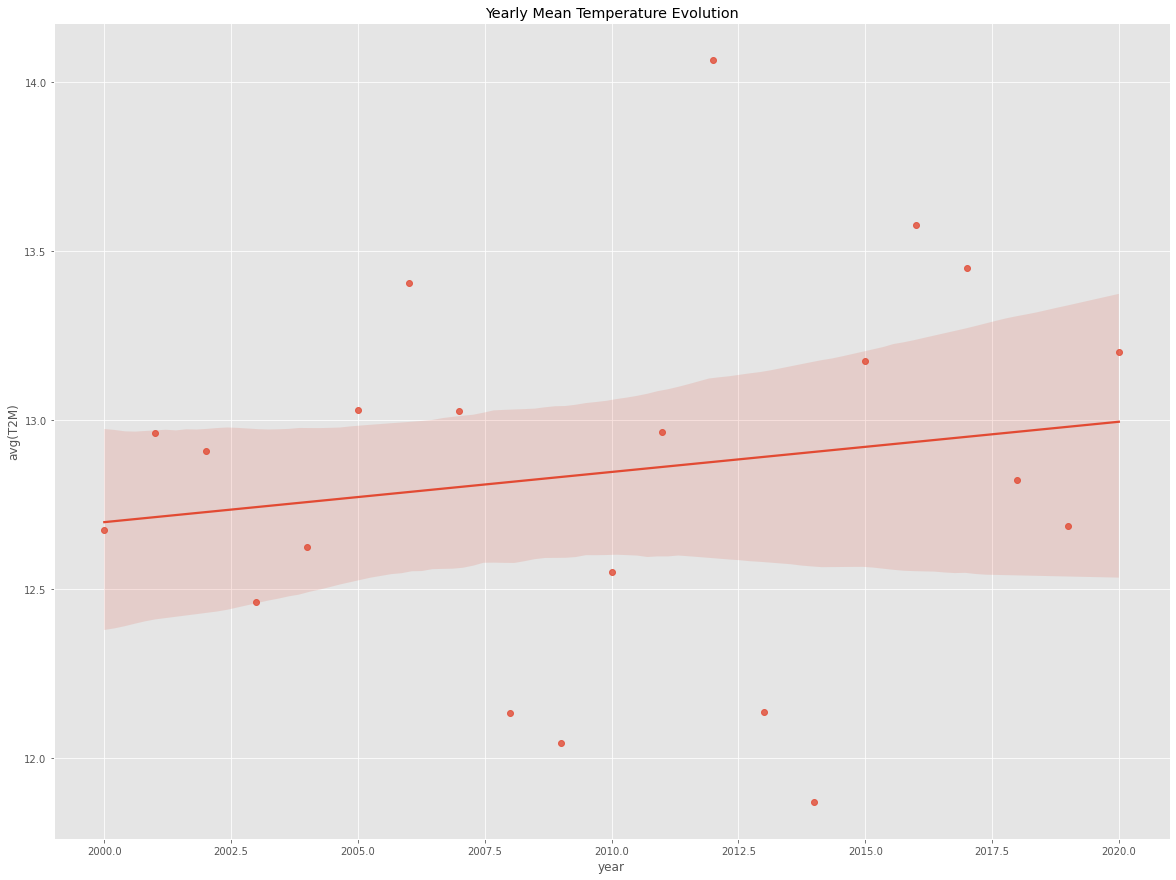

In [31]:
fig,ax = plt.subplots(figsize=(20,15))
sns.regplot(data=vertical_stack, x="year", y="avg(T2M)", ax=ax)
ax.set_title("Yearly Mean Temperature Evolution")

 We can se how there's a slight positive slope, clearly idicating how the tendency is towards a general temperature increase.

#### PRECTOT

PRECTOT qualify the total amount of rain in mm/day. As we saw in the resume before it looks quite skewed, and the 50% of the data has 0.018 or less mm/day of rain. Generally speaking, the convention for measuring rain is mm/h; that gives an idea of the intensity of the rainfall and could help understanding if we had a storm or a slight rain for long hours during the day. 

From the summary we could infer that this feature was quite skewed. Let's confrim this:

```python
#SPARK IMPLEMENTATION
train.select(F.skewness("PRECTOT"),F.kurtosis("PRECTOT")).show()
```

In [33]:
print("Skewness(PRECTOT): ",train_sub["PRECTOT"].skew())
print("Kurtois(PRECTOT): ",train_sub["PRECTOT"].kurt())

Skewness(PRECTOT):  5.126202345463095
Kurtois(PRECTOT):  45.38527230515044


It is indeed quite skewed with a very high Kurtoisis. To understand what could be considered as outlier, we can create boundaries using the Inter-Quartile Range:

```python
#SPARK IMPLEMENTATION

#Let's evaluate more quantiles
quantiles = train.approxQuantile(["PRECTOT"], [0.10,0.25,0.5,0.6,0.75, 0.85, 0.95], 0.05)
quantiles

def IQR(df, cols:list):
    """This function computes the Interquartile Range and the boudries that help discriminating outliers
    """
    bounds = {}
    for col in cols:
        quantiles = df.approxQuantile(col, [0.25, 0.75], 0.05)
            
    IQR = quantiles[1] - quantiles[0]

    #Anything below the lower limit and above the upper limit is considered an outlier.
    bounds[col] = [
     quantiles[0] - 1.5 * IQR, #upper boundry
     quantiles[1] + 1.5 * IQR  #lower boundry
     ]
        
    return bounds[col]

IQR(train, ["PRECTOT"])
```

In [36]:
def IQRRange(data, col):
    """This function computes the Interquartile Range and the boudries that help discriminating outliers
    """
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = round(Q1 - 1.5 * IQR, 2)
    upper_range = round(Q3 + 1.5 * IQR,2)
    print("Lower and Upper bound: ",[lower_range,upper_range])

In [37]:
IQRRange(train_sub, "PRECTOT")

IQR value for column PRECTOT is: 2.18
Lower and Upper bound:  [-3.27, 5.45]


It looks like the data is positively skewed, and with a high Kurtoisis value (the higher the longer the tail). Also the IQR boudries show that everything above ~5.45mm/day precipitation is an outlier. Let's visualize this:

To compare the distribution of subsets that differ substantially in size, I will use indepdendent density normalization: (https://seaborn.pydata.org/generated/seaborn.histplot.html)

Text(0.5, 1.0, 'PRECTOT indipendent densities VS score')

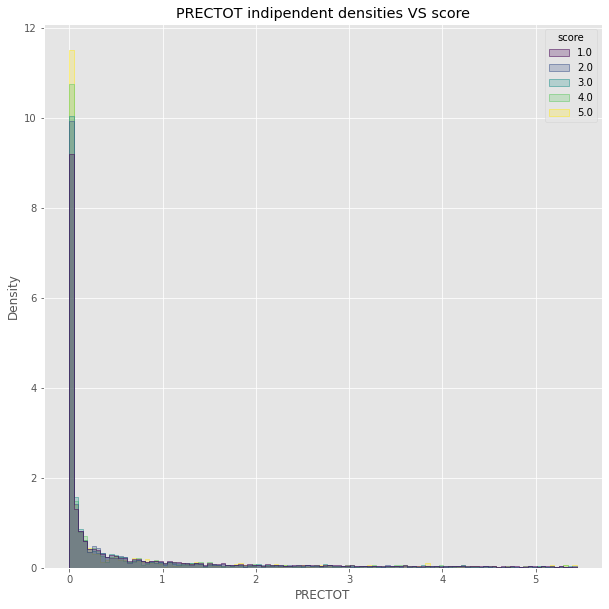

In [38]:
#due to the long tailed data, we decided to cap it to 5.45 mm/day
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    train_sub[train_sub["PRECTOT"]<5.45], x="PRECTOT", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)
ax.set_title("PRECTOT indipendent densities VS score")

As we can see, there's a correlation with the presence of the rain and the drought level. For rains levels > 0 there's no separations between drought levels. We could think of binarizing the feature and have a 1 for rain and 0 for no-rain.

```python
#SPARK IMPLEMENTATION
columns = ["PRECTOT","score"]
PRECTOT = train.select(*[columns]).toPandas()
#learn pyspark
sns.boxplot(data=PRECTOT.PRECTOT, orient="h")

plt.tight_layout()
```

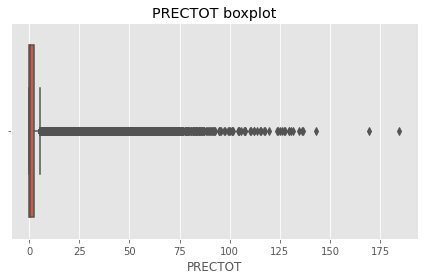

In [40]:
sns.boxplot(data=train_sub,x="PRECTOT", orient="h", )
plt.title("PRECTOT boxplot")

plt.tight_layout()

```python
#SPARK IMPLEMENTATION
train.filter("PRECTOT > 3.95").count()
```

In [42]:
train_sub[train_sub["PRECTOT"]>5.45]["PRECTOT"].count()

44718

~15% of the total daily precipitation goes above 5.45mm (75th percentile* 1.5 IQR). We can see that there's a certain outlier's continuity continuity up untill 100 mm/day. Outliers could be seen as floods or very heavy rains. There are various ways of dealing with outliers:
* Binning the feature
* Capping the outliers using IQR boundries
* Transforming the feature (eg. log transformation)
* Using a robust scaler 

I think that going for the last one is the reasonebale solution for all the skewed features, without altring too much our dataset.

#### PS

This is the Surface Pressure (kPa). High-pressure systems reduce evaporation and moisture in the atmosphere so we will consider this feature as important. [[11]](#References)

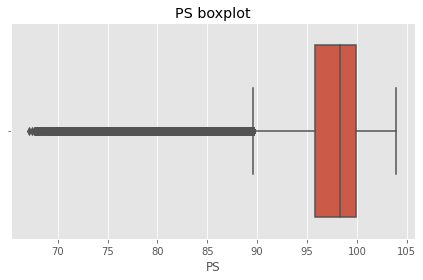

In [43]:
sns.boxplot(data=train_sub,x="PS", orient="h", )
plt.title("PS boxplot")

plt.tight_layout()

Text(0.5, 1.0, 'PS indipendent densities VS score')

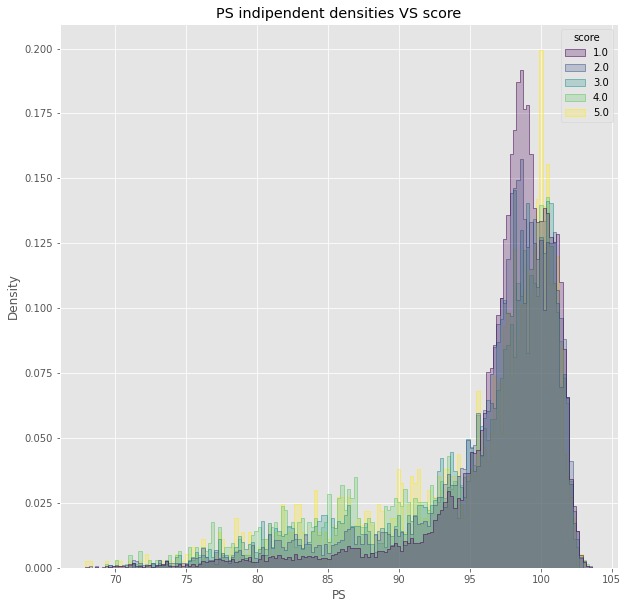

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    train_sub, x="PS", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)
ax.set_title("PS indipendent densities VS score")

As we can see the distribuition of pressures with different drought levels is quite similar. We can see as well a spike of the maximum  level of drought at about ~100KPa. Altough this plot is interesting, we can see that pressure is a not so high discriminant for drought as all the graphs are one on top of the other.

In [45]:
IQRRange(train_sub, "PS")

IQR value for column PS is: 4.13000000000001
Lower and Upper bound:  [89.62, 106.15]


As we can see we have a high number of outliers below 89 KPa. Let's try to understand how many of them:

In [46]:
train_sub[train_sub["PS"]<89.62]["PS"].count()

31299

That's about 10% of the data, again, it's a considerable amount that we will address with a robust scaler.

#### TS

Earth Skin Temperature (C). Land Surface Temperature is an important variable within the Earth climate system. It describes processes such as the exchange of energy and water between the land surface and atmosphere, and influences the rate and timing of plant growth.[[9]](#references)

Accurately understanding Land Surface Temperature at the global and regional level helps to evaluate land surface–atmosphere exchange processes in models and, when combined with other physical properties such as vegetation and soil moisture, provides a valuable metric of surface state. [[10]](#references) This might suggest as well that more data about the soil and vegetation might be needed.

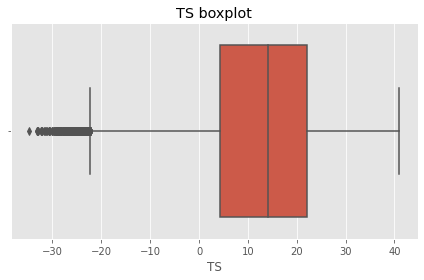

In [47]:
sns.boxplot(data=train_sub,x="TS", orient="h", )
plt.title("TS boxplot")

plt.tight_layout()

Text(0.5, 1.0, 'TS indipendent densities VS score')

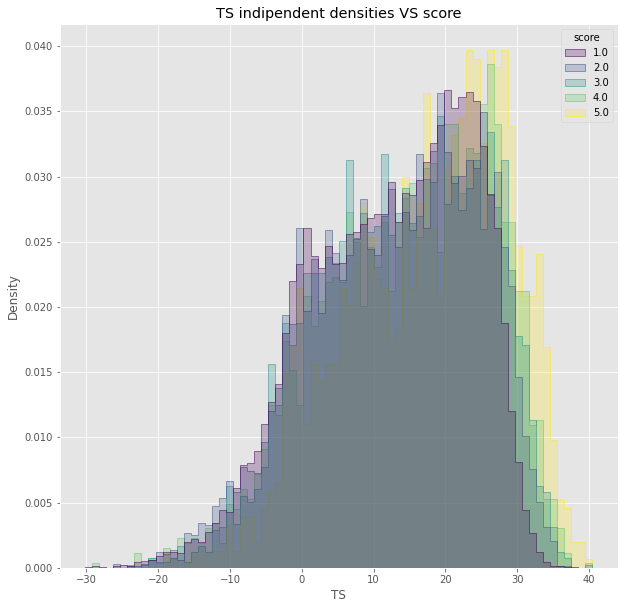

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    train_sub, x="TS", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)
ax.set_title("TS indipendent densities VS score")

Here we can see how, at higher level of TS we get an increase in the density of higher levels of drought.

In [49]:
IQRRange(train_sub,"TS")

IQR value for column TS is: 17.72
Lower and Upper bound:  [-22.24, 48.64]


Median of TS  is around 15 C. We can see how the data spred is between -20 and 40 C with outliers in the lower part up until -30C. 

In [50]:
train_sub[train_sub["TS"]<-22.24]["TS"].count()

319

Thast's ~1% of the original data.

#### QV2M

Specific Humidity at 2 Meters (g/kg) represents the concentration of water vapor present in the air. [[12]](#references)

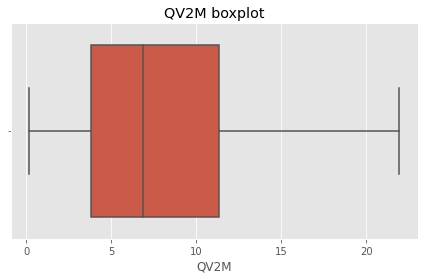

In [51]:
sns.boxplot(data=train_sub,x="QV2M", orient="h", )
plt.title("QV2M boxplot")

plt.tight_layout()

Text(0.5, 1.0, 'QV2M indipendent densities VS score')

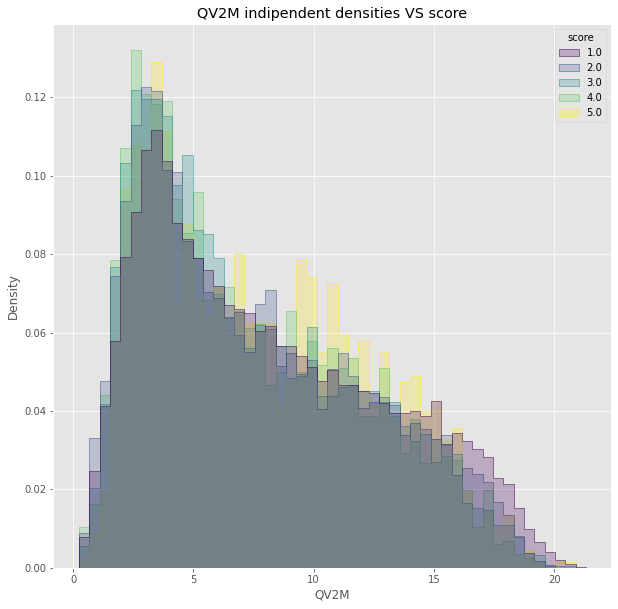

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    train_sub, x="QV2M", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)
ax.set_title("QV2M indipendent densities VS score")

The distribuition is right skewed, with a slight increase in the densities of drought levels between 10 and 15 g/Kg 

In [53]:
IQRRange(train_sub,"QV2M")

IQR value for column QV2M is: 7.57
Lower and Upper bound:  [-7.58, 22.7]


In [54]:
train_sub[train_sub["QV2M"]>22.7]["QV2M"].count()

0

#### T2MWET

The wet-bulb temperature is the lowest temperature that may be achieved by evaporative cooling of a water-wetted, ventilated surface. If a thermometer is wrapped in a water-moistened cloth, it will behave differently. The drier and less humid the air is, the faster the water will evaporate. The faster water evaporates, the lower the thermometer's temperature will be relative to air temperature.[[13]](#references)

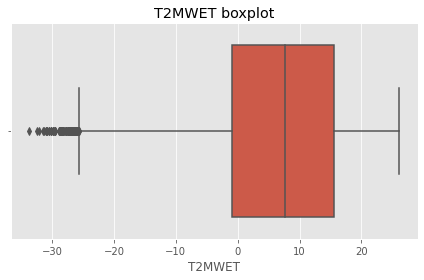

In [55]:
sns.boxplot(data=train_sub,x="T2MWET", orient="h", )
plt.title("T2MWET boxplot")

plt.tight_layout()

Text(0.5, 1.0, 'T2MWET indipendent densities VS score')

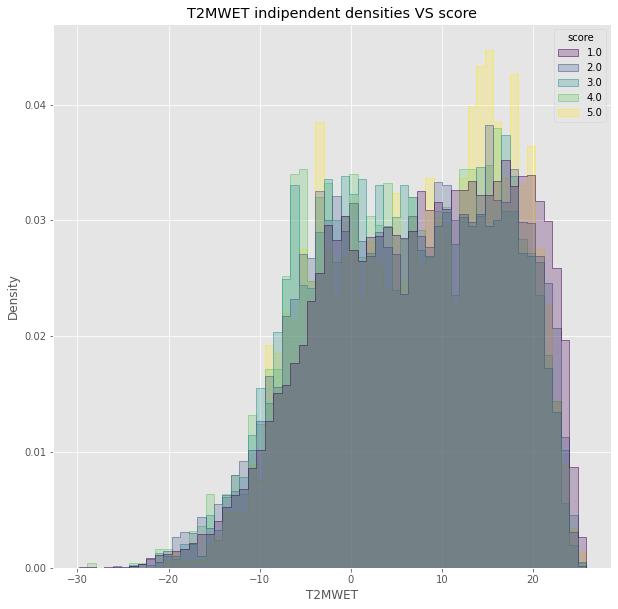

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    train_sub, x="T2MWET", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)
ax.set_title("T2MWET indipendent densities VS score")

Here we can see a slight higher density between 10 and 20 C of the highes level of drought.

In [57]:
IQRRange(train_sub, "T2MWET")

IQR value for column T2MWET is: 16.47
Lower and Upper bound:  [-25.65, 40.22]


In [58]:
train.filter("T2MWET < -25.65").count()

95

Here as well we have very few outliers.

#### T2MDEW

The dew point is the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content. When cooled below the dew point, moisture capacity is reduced and airborne water vapor will condense to form liquid water known as dew. When this occurs via contact with a colder surface, dew will form on that surface. [[14]](#references)

In [59]:
columns = ["T2MDEW", "score"]
T2MDEW = train.select(*columns).toPandas()

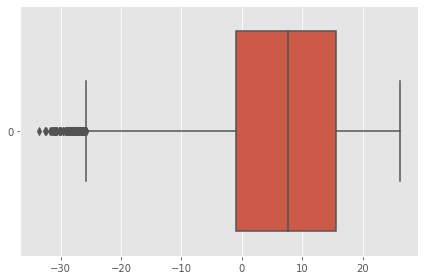

In [60]:
sns.boxplot(data=T2MDEW.T2MDEW, orient="h")

plt.tight_layout()

<AxesSubplot:xlabel='T2MDEW', ylabel='Density'>

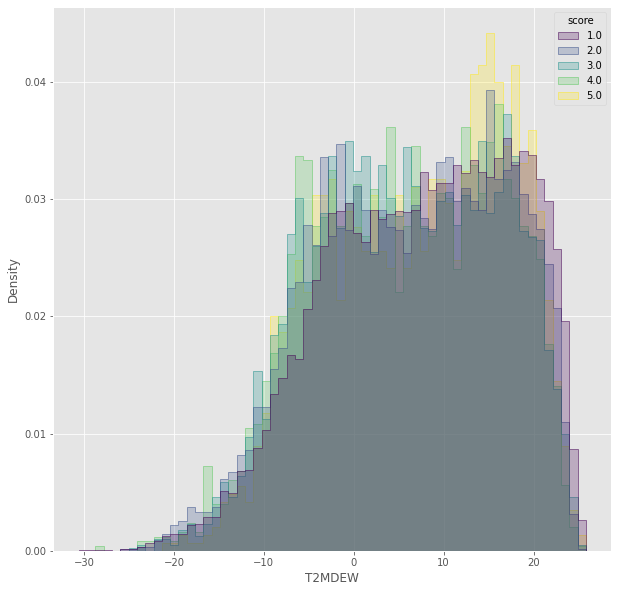

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(
    T2MDEW, x="T2MDEW", hue="score", element="step",
    stat="density", common_norm=False, hue_norm=(1,5), palette="viridis", ax=ax
)

As for T2MWET, we can se the same pattern, where the highest drought level is denser between 10 and 20 C.

In [62]:
IQRRange(train_sub, "T2MDEW")

IQR value for column T2MDEW is: 16.509999999999998
Lower and Upper bound:  [-25.75, 40.28]


In [63]:
train_sub[train_sub["T2MDEW"]<-24.59]["T2MDEW"].count()

198

It looks that for both T2MDEW and T2MWET higher temperatures present an higher level of drought density. Also I expect both variables to be higly correlated.

### Bivariate and Multivariate analysis

Let's go ahead with our analysis and have a look of how they correlate between each other and if we can find come interesting patterns:

#### T2M, T2M_RANGE, T2M_MIN, T2M_MAX

Temperature, range, min and max at 2 meters will be considered all together because they are part of the same "family".

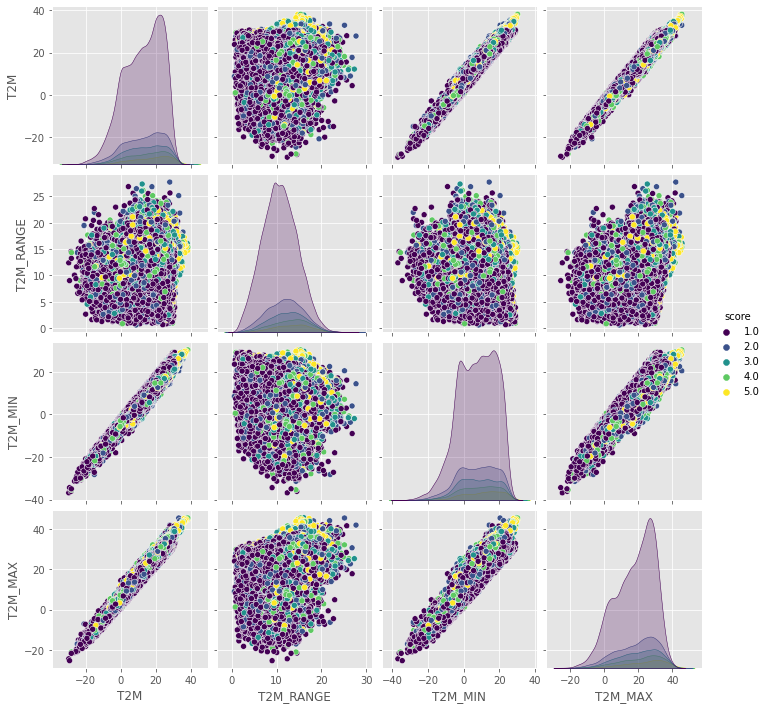

In [64]:
sns.pairplot(train_sub[["T2M", "T2M_RANGE", "T2M_MIN", "T2M_MAX", "score"]], hue="score", palette="viridis")

As expected, there's a strong linear correlation between the temperature, max and min. Distribuitions are slightly negatively skewed apart from the temperature range that has a normal distribuition.
Generally multicollinearity is not welcome, and high correlated data should be taken care of. Again no strong separation between different levels of droughts for each single feature, but we can see a pattern for all the bivariate scatter plots where the higher levels of drought are in the upper right part of the grid, indicating an higher probability of droughts at higher temperatures. It is important to underline that due to the nature of the plot, we can't make precise affirmation because we don't know what's hiding behind the higher density points in the scatter plots.

#### WS50M, WS50M_MAX, WS50M_MIN, WS50M_RANGE

As before we treat the wind speed at 50m all together.

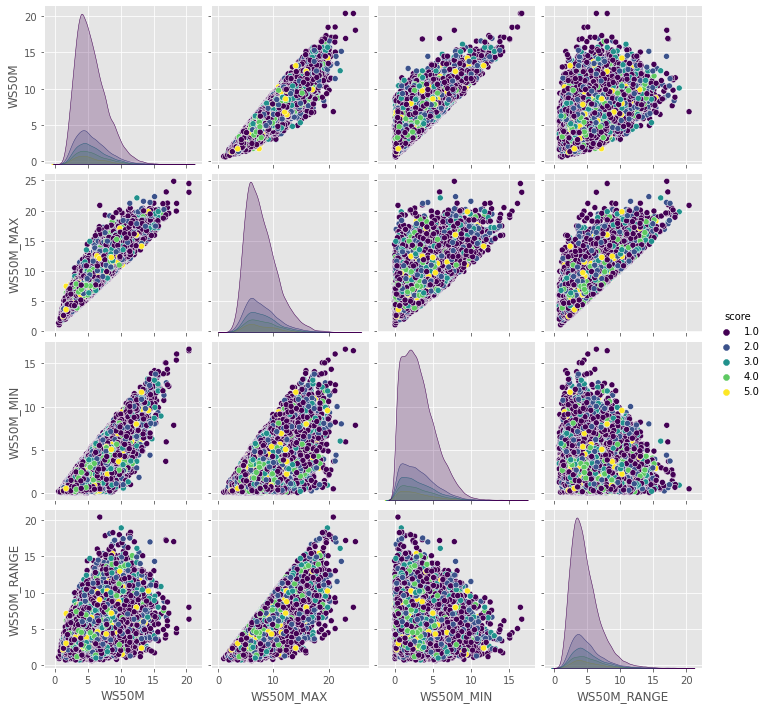

In [65]:
sns.pairplot(train_sub[["WS50M", "WS50M_MAX", "WS50M_MIN", "WS50M_RANGE", "score"]], hue="score", palette="viridis")

As per the temperatures, here we can see the positive correlation between the wind speed and the max wind speed. Compared to the temperatures plot, here we have a different spread of the data, so dropping them might not be the solution. From the data distribuition we can also see how a feature transformation could be positive and bring the distribuition to normal (beneficial for linear models). In this case appling a log transformation could be advisable. Furthermore there might be a pattern where highest levels of drought could be associated with lower wind speeds.

####  WS10M, WS10M_MAX, WS10M_MIN, WS10M_RANGE

These features are the same as the W50 except for the fact that now the distance is 10m.

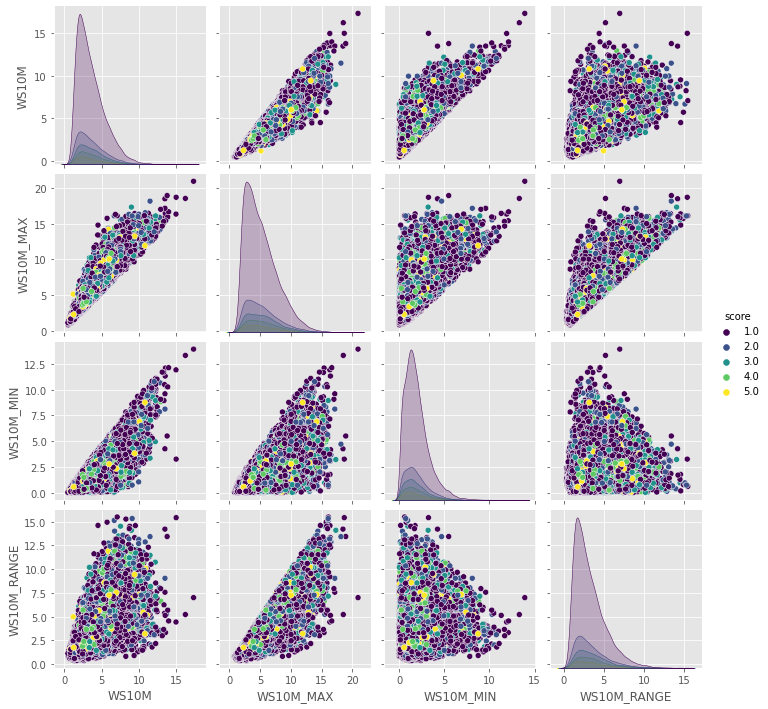

In [66]:
sns.pairplot(train_sub[["WS10M", "WS10M_MAX", "WS10M_MIN", "WS10M_RANGE", "score"]], hue="score", palette="viridis")

Here, we can do the same considerations as for WS50M. Again we can see a strong linear correlation between WS10M_MAX and WS10M but with a non negligible spread of the data.

#### PRECTOT vs PS

We think it would be interesting showing the correlation between pressure, wind speeds and precipitations.

Text(0.5, 1.0, 'PRECTOT VS PS')

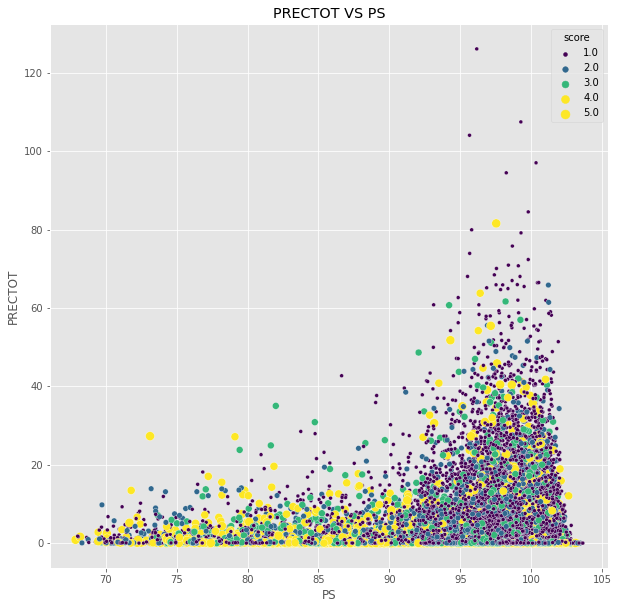

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=train_sub, x="PS", y="PRECTOT", palette="viridis", size="score", hue="score", hue_norm=(1,4), sizes=(15,80))
ax.set_title("PRECTOT VS PS")

A bivariate scatter plot is not very indicated for skewd data, because we cant really see what's behind the lower right part of the plot with high density points. We will use a kernel density plot instead.

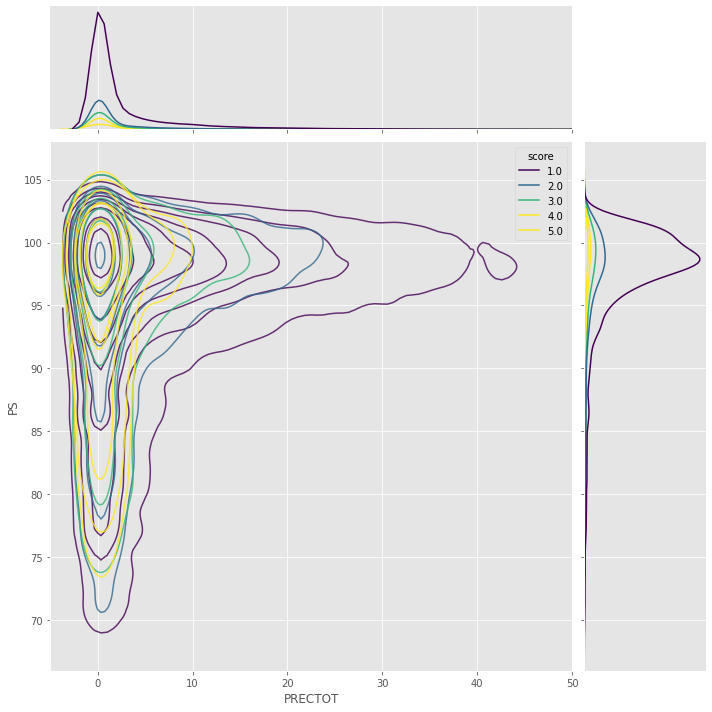

In [68]:
sns.jointplot(data=train_sub, x="PRECTOT", y="PS", hue="score", alpha=0.8, palette="viridis", height=10, space=0.1, kind="kde", hue_norm=(1,4), ratio=4, xlim=(-5,50), ylim=(66,108))

From this plot, we ca't really see a strong pattern that indicates how a PS-PRECTOT variation could influence drought. As we would expect the higher drought density is at higher pressures and low precipitations.

#### PRECTOT vs T2M

Let's analize now precipitations vs the temperature in the same way:

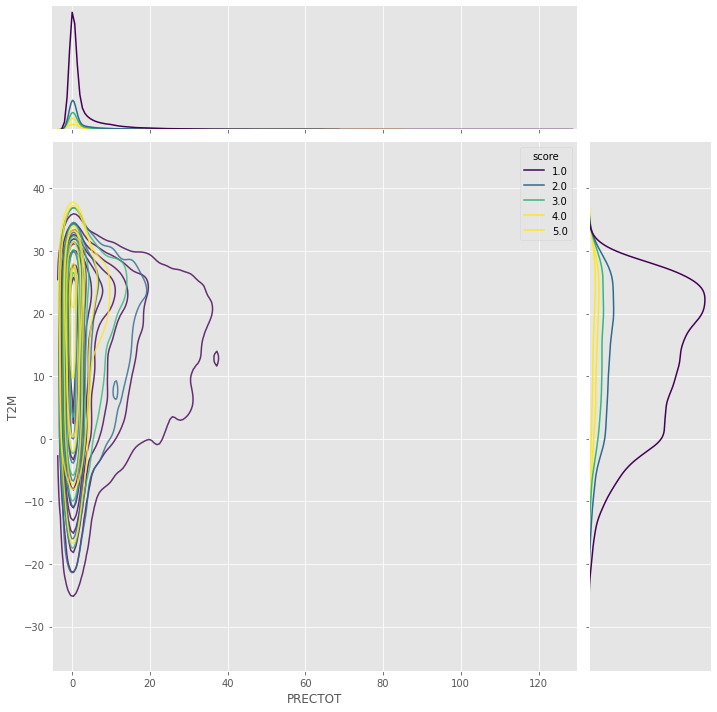

In [69]:
sns.jointplot(data=train_sub, x="PRECTOT", y="T2M", hue="score", alpha=0.8, palette="viridis",kind="kde", height=10, space=0.1, hue_norm=(1,4), ratio=4)

As we can see, the higher the temperature and the lower the precipitation, we get higher levels of droughts.

#### T2MWET vs T2MDEW

Let's visualize now the relation between the dew point and the wet bulb temperature, this time compared with the specific humidity.

The key difference between dewpoint and wet bulb temperature is that dewpoint temperature is the temperature to which we should cool the air to saturate the air with water vapor whereas wet bulb temperature is the temperature that we get from a moistened thermometer bulb that is exposed to air flow. Dew point and wet bulb temperatures are very important in indicating the state of the humid air.[[15]](#references)

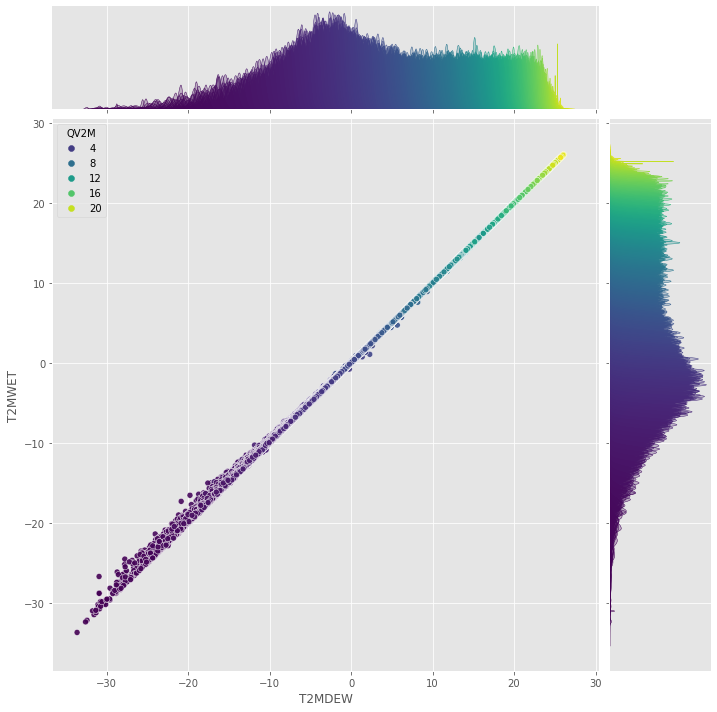

In [70]:
sns.jointplot(data=train_sub, x="T2MDEW", y="T2MWET", hue="QV2M", alpha=0.9, palette="viridis", height=10, space=0.1)

As expected, we have a strong linear correlation with T2MWET, T2MDEW.

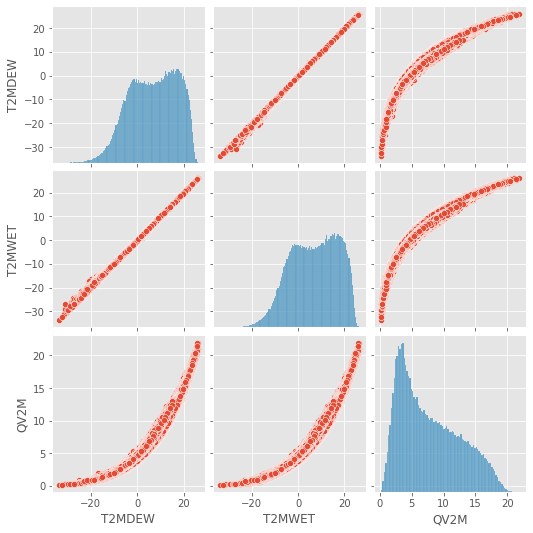

In [71]:
sns.pairplot(train_sub[["T2MDEW", "T2MWET", "QV2M"]])

We can see a linear correlation between temeperatures and a logarithmic correlation with QV2M.

In [72]:
train_sub[["T2MDEW", "T2MWET", "QV2M"]].corr()

T2MDEW    T2MWET      QV2M
T2MDEW  1.000000  0.999967  0.959774
T2MWET  0.999967  1.000000  0.960865
QV2M    0.959774  0.960865  1.000000

#### Is extra data useful?

Before going ahead, we might ask ourselves if extra data would be usefult. As we said before, maybe that soild that could be helpful, as knowing the amount of vegetation. Therefore we will add to our dataset the Harmonized World Soil Database.

In [73]:
soil_data_path = "/user/mgarg001/CW2/soil_data.csv"
soil_data = spark.read.csv(soil_data_path, inferSchema=True, header=True)

In [74]:
soil_data.printSchema()

root
 |-- fips: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- elevation: integer (nullable = true)
 |-- slope1: double (nullable = true)
 |-- slope2: double (nullable = true)
 |-- slope3: double (nullable = true)
 |-- slope4: double (nullable = true)
 |-- slope5: double (nullable = true)
 |-- slope6: double (nullable = true)
 |-- slope7: double (nullable = true)
 |-- slope8: double (nullable = true)
 |-- aspectN: double (nullable = true)
 |-- aspectE: double (nullable = true)
 |-- aspectS: double (nullable = true)
 |-- aspectW: double (nullable = true)
 |-- aspectUnknown: double (nullable = true)
 |-- WAT_LAND: double (nullable = true)
 |-- NVG_LAND: double (nullable = true)
 |-- URB_LAND: double (nullable = true)
 |-- GRS_LAND: double (nullable = true)
 |-- FOR_LAND: double (nullable = true)
 |-- CULTRF_LAND: double (nullable = true)
 |-- CULTIR_LAND: double (nullable = true)
 |-- CULT_LAND: double (nullable = true)
 |-- SQ1: inte

| Indicator     	| Description                                                                                                	|
|---------------	|------------------------------------------------------------------------------------------------------------	|
| Latitude      	| Minimum Wind Speed at 10 Meters (m/s)                                                                      	|
| Longitude     	| Specific Humidity at 2 Meters (g/kg)                                                                       	|
| Elevation     	| Median Elevation (meters)                                                                                  	|
| slope1        	| 0 % ≤ slope ≤ 0.5 %                                                                                        	|
| slope2        	| 0.5 % ≤ slope ≤ 2 %                                                                                        	|
| slope3        	| 2 % ≤ slope ≤ 5 %                                                                                          	|
| slope4        	| 5 % ≤ slope ≤ 10 %                                                                                         	|
| slope5        	| 10 % ≤ slope ≤ 15 %                                                                                        	|
| slope6        	| 15 % ≤ slope ≤ 30 %                                                                                        	|
| slope7        	| 30 % ≤ slope ≤ 45 %                                                                                        	|
| slope8        	| Slope > 45 %                                                                                               	|
| aspectN       	| North: 0˚< aspect ≤45˚ or 315˚< aspect ≤360˚                                                               	|
| aspectE       	| East: 45˚ < aspect ≤ 135˚                                                                                  	|
| aspectS       	| South: 135˚ < aspect ≤ 225˚                                                                                	|
| aspectW       	| West: 225˚ < aspect ≤ 315˚                                                                                 	|
| aspectUnknown 	| Undefined: Slope aspect undefined; this value is used for grids where slope gradient is undefined or slope 	|
| WAT_LAND      	| mapped water bodies                                                                                        	|
| NVG_LAND      	| barren/very sparsely vegetated land                                                                        	|
| URB_LAND      	| built-up land (residential and infrastructure)                                                             	|
| GRS_LAND      	| grass/scrub/woodland                                                                                       	|
| FOR_LAND      	| forest land, calibrated to FRA2000 land statistics                                                         	|
| CULTRF_LAND   	|                                                                                                            	|
| CULTIR_LAND   	| irrigated cultivated land, according to GMIA 4.0                                                           	|
| CULT_LAND     	| total cultivated land                                                                                      	|
| SQ1           	| Nutrient availability                                                                                      	|
| SQ2           	| Nutrient retention capacity                                                                                	|
| SQ3           	| Rooting conditions                                                                                         	|
| SQ4           	| Oxygen availability to roots                                                                               	|
| SQ5           	| Excess salts.                                                                                              	|
| SQ6           	| Toxicity                                                                                                   	|
| SQ7           	| Workability (constraining field management)                                                                	|
|               	|                                                                                                            	|

It seems that we have some interesting features. My attention went towards these:
* lat : latitude
* long : longitude
* elevation : Median elevation (meters)
* WAT_LAND: mapped water bodies
* NVG_LAND: barren/very sparsely vegetated land
* URB_LAND: built-up land (residential and infrastructure)
* GRS_LAND : grass/scrub/woodland
* FOR_LAND : forest land, calibrated to FRA2000 land statistics
* CULT_LAND : total cultivated land


Let's have a look at the data:

In [75]:
soil_data.limit(5).toPandas()

fips        lat        lon  elevation  slope1  slope2  slope3  slope4  \
0  1001  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1  1005  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2  1003  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3  1007  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4  1009  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576   

   slope5  slope6  ...  CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  \
0  0.1142  0.0170  ...    56.293411     1.014811  57.308224    1    1    1   
1  0.0106  0.0003  ...    72.578804     1.828159  74.406960    3    2    1   
2  0.0000  0.0000  ...    59.843639     2.996914  62.840553    3    2    1   
3  0.0898  0.0134  ...     1.916593     0.008330   1.924924    3    2    1   
4  0.1477  0.1037  ...     1.891909     0.027488   1.919397    3    2    1   

   SQ4  SQ5  SQ6  SQ7  
0    1    1    1    2  
1    1    1    1    1  
2    2    1    1    1  
3    1    1    1    1  
4    1    1    1    1  

[5 rows x 32 columns]

In [76]:
soil_data.describe().toPandas().T

0                     1                    2            3  \
summary        count                  mean               stddev          min   
fips            3109    30678.538436796396   14986.018729724376         1001   
lat             3109     38.28005238082985    4.838633548529421    25.601043   
lon             3109    -91.65979031907371   11.485290906584115  -124.211407   
elevation       3109     427.6246381473143    500.1588798256434           -1   
slope1          3109   0.05497349630106142  0.08987262732827925          0.0   
slope2          3109   0.29774995175297514    0.215950147743237          0.0   
slope3          3109    0.3199908009006106   0.1677271931386821          0.0   
slope4          3109   0.15587780636860718  0.12839966966503447          0.0   
slope5          3109  0.053408684464458046  0.07310677573348823          0.0   
slope6          3109   0.06532274043100689   0.1255257827072851          0.0   
slope7          3109  0.022222965583789007  0.06412721149108264          0.0   
slope8          3109  0.009266966870376325  0.04493276557945523          0.0   
aspectN         3109   0.14374905114184658  0.07823680909804893          0.0   
aspectE         3109   0.16888752010292718  0.08410466470661306          0.0   
aspectS         3109   0.14839215181730483  0.08211143005762475          0.0   
aspectW         3109    0.1650612415567709  0.08784278236877606          0.0   
aspectUnknown   3109   0.35272344805403644  0.27218239926320237          0.0   
WAT_LAND        3109    2.8505108268477977   13.159246909751872          0.0   
NVG_LAND        3109    1.8014505325146037    7.971804702331519          0.0   
URB_LAND        3109    2.6700260144075822    9.770693418737087          0.0   
GRS_LAND        3109     19.81215402739034   25.447435040043278          0.0   
FOR_LAND        3109      39.2965858556991    34.36552958692783          0.0   
CULTRF_LAND     3109    28.494803833838905   31.839502400837436          0.0   
CULTIR_LAND     3109    3.5046817856372754   10.290892935315396          0.0   
CULT_LAND       3109     31.99948561935647    33.09965734079889          0.0   
SQ1             3109    1.8304921196526214   1.1922191634939037            0   
SQ2             3109    1.5535541974911546   1.0213822784467805            0   
SQ3             3109     1.282084271469926    1.002508451955512            0   
SQ4             3109    1.3573496301061434   1.0301104764120796            0   
SQ5             3109    1.1469926021228691   0.9223076196060345            0   
SQ6             3109     1.135091669347057   0.9145016257918899            0   
SQ7             3109    1.2849790929559344   1.0174646935967402            0   

                              4  
summary                     max  
fips                      56045  
lat                   48.842653  
lon                  -67.609354  
elevation                  3561  
slope1                    0.974  
slope2                   0.7599  
slope3                   0.6969  
slope4                   0.5717  
slope5                     0.33  
slope6                   0.6068  
slope7                   0.4765  
slope8                   0.6288  
aspectN                  0.4784  
aspectE                  0.7385  
aspectS                  0.5112  
aspectW                  0.6578  
aspectUnknown               1.0  
WAT_LAND                  100.0  
NVG_LAND       99.9829177856445  
URB_LAND       99.9987640380859  
GRS_LAND       99.9985961914063  
FOR_LAND       91.0446090698242  
CULTRF_LAND    97.0295715332031  
CULTIR_LAND    99.9568405151367  
CULT_LAND      99.9568405151367  
SQ1                           7  
SQ2                           7  
SQ3                           7  
SQ4                           7  
SQ5                           7  
SQ6                           7  
SQ7                           7

In [77]:
# soil_data_pandas = soil_data.toPandas()

Let's join our data exploration datasets for a more indepth study:

In [78]:
soil_df = soil_data.alias("soild_data")

In [79]:
joined_data = train.join(soil_df, ["fips"], "left")

In [80]:
joined_datap = joined_data.toPandas()

Let's visualize now the droughts levels on a map using latitude and longitude.

In [81]:
# from urllib.request import urlopen
# import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})

# import plotly.express as px

# fig = px.choropleth_mapbox(joined_datap, geojson=counties, locations='fips', color='score',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            mapbox_style="carto-positron",
#                            zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
#                            opacity=0.5,
#                            labels={'score':'unemployment rate'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

Text(0.5, 1.0, 'Drought levels across USA')

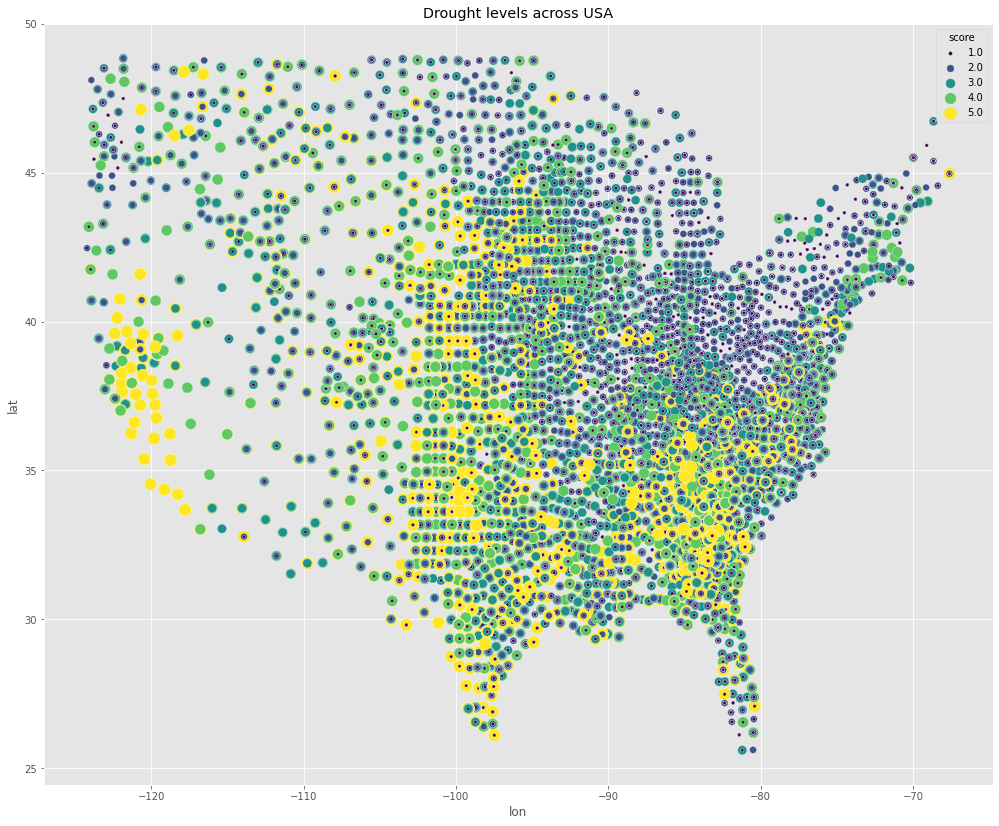

In [82]:
fig, ax = plt.subplots(figsize=(17,14))
sns.scatterplot(data=joined_datap, x="lon",y="lat", hue="score", size="score", sizes=(10,150), palette="viridis", hue_norm=(1,5))
ax.set_title("Drought levels across USA")

From this plot we can see that:
* california is affected by severe droughts
* Sourthen states are more affected by droughts as well as some in center US
* lat/lon are defietly a factor in depicting drought

Let's have a look now on where most of the outliers in PRECTOT had place:

<AxesSubplot:xlabel='lon', ylabel='lat'>

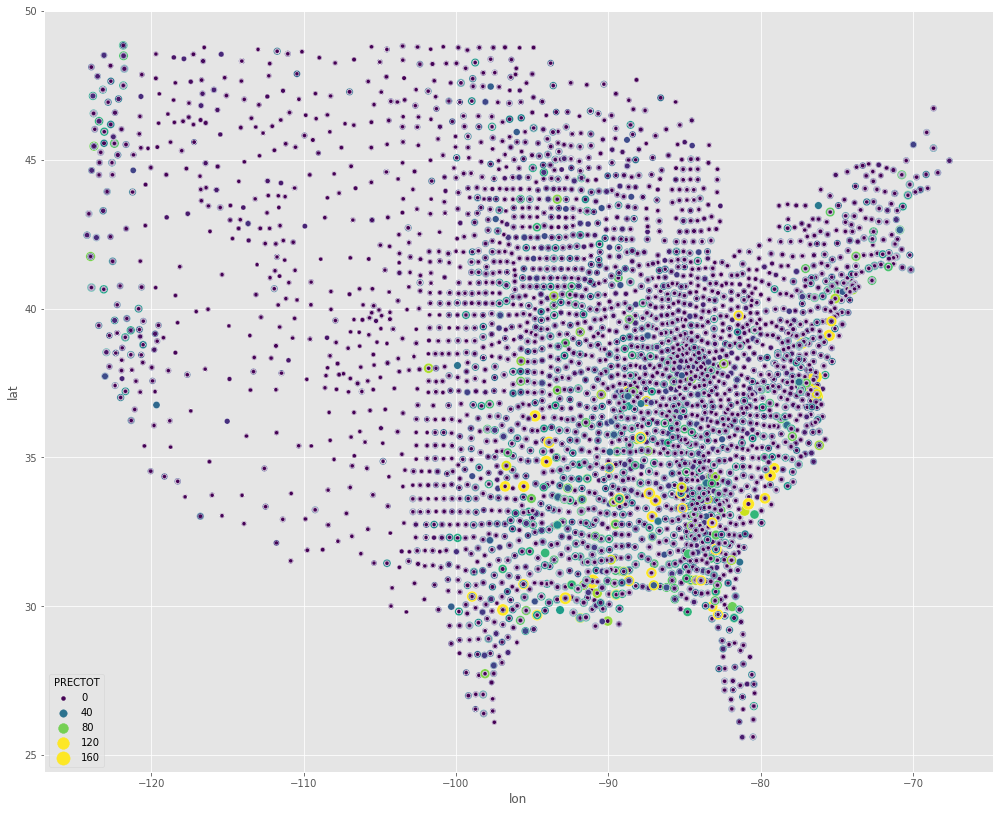

In [83]:
fig, ax = plt.subplots(figsize=(17,14))
sns.scatterplot(data=joined_datap, x="lon",y="lat", hue="PRECTOT", size="PRECTOT", sizes=(15,200), palette="viridis", hue_norm=(3.95,100))

Looks like south east is the most hit. It might be due as well to the hurricane season. Let's confirm this by plotting the winds.

<AxesSubplot:xlabel='lon', ylabel='lat'>

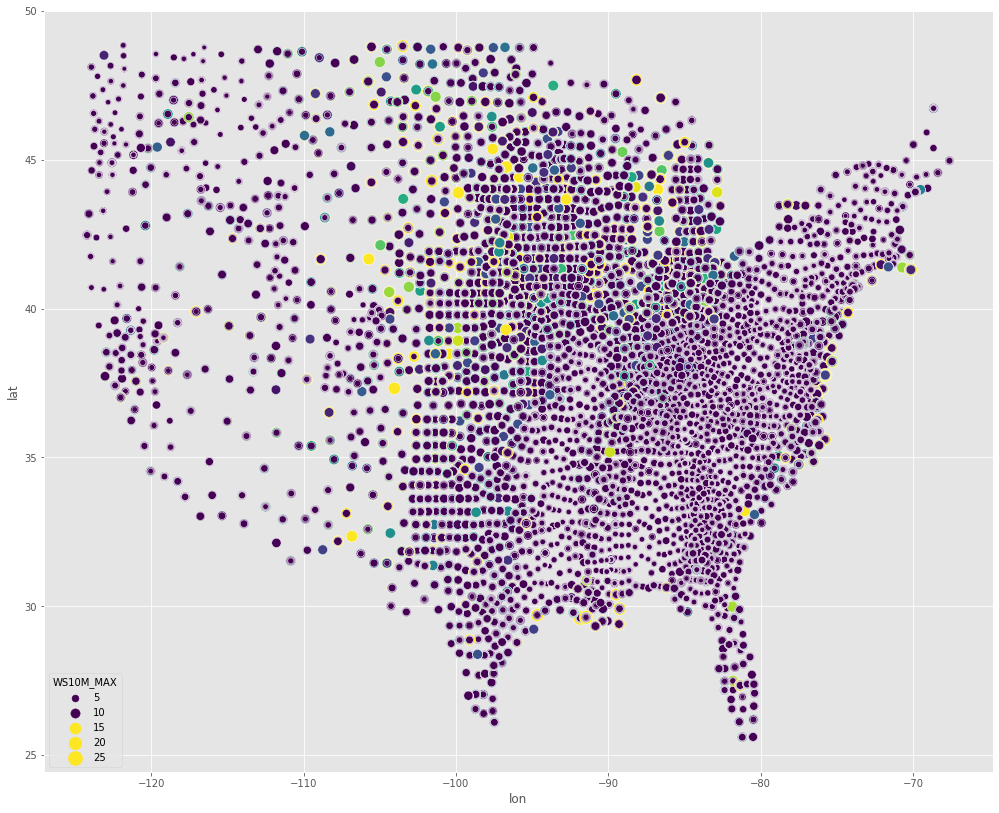

In [84]:
fig, ax = plt.subplots(figsize=(17,14))
sns.scatterplot(data=joined_datap, x="lon",y="lat", hue="WS10M_MAX", size="WS10M_MAX", sizes=(15,200), palette="viridis", hue_norm=(10,15))

There is some correspondence on the south east coast, but anyway it seems that the highest winds are up north. Please ote that yellow dots indicate speed from 50 to 90 km/h.

#### Correlation

Let's have a look now at the correllation between features:

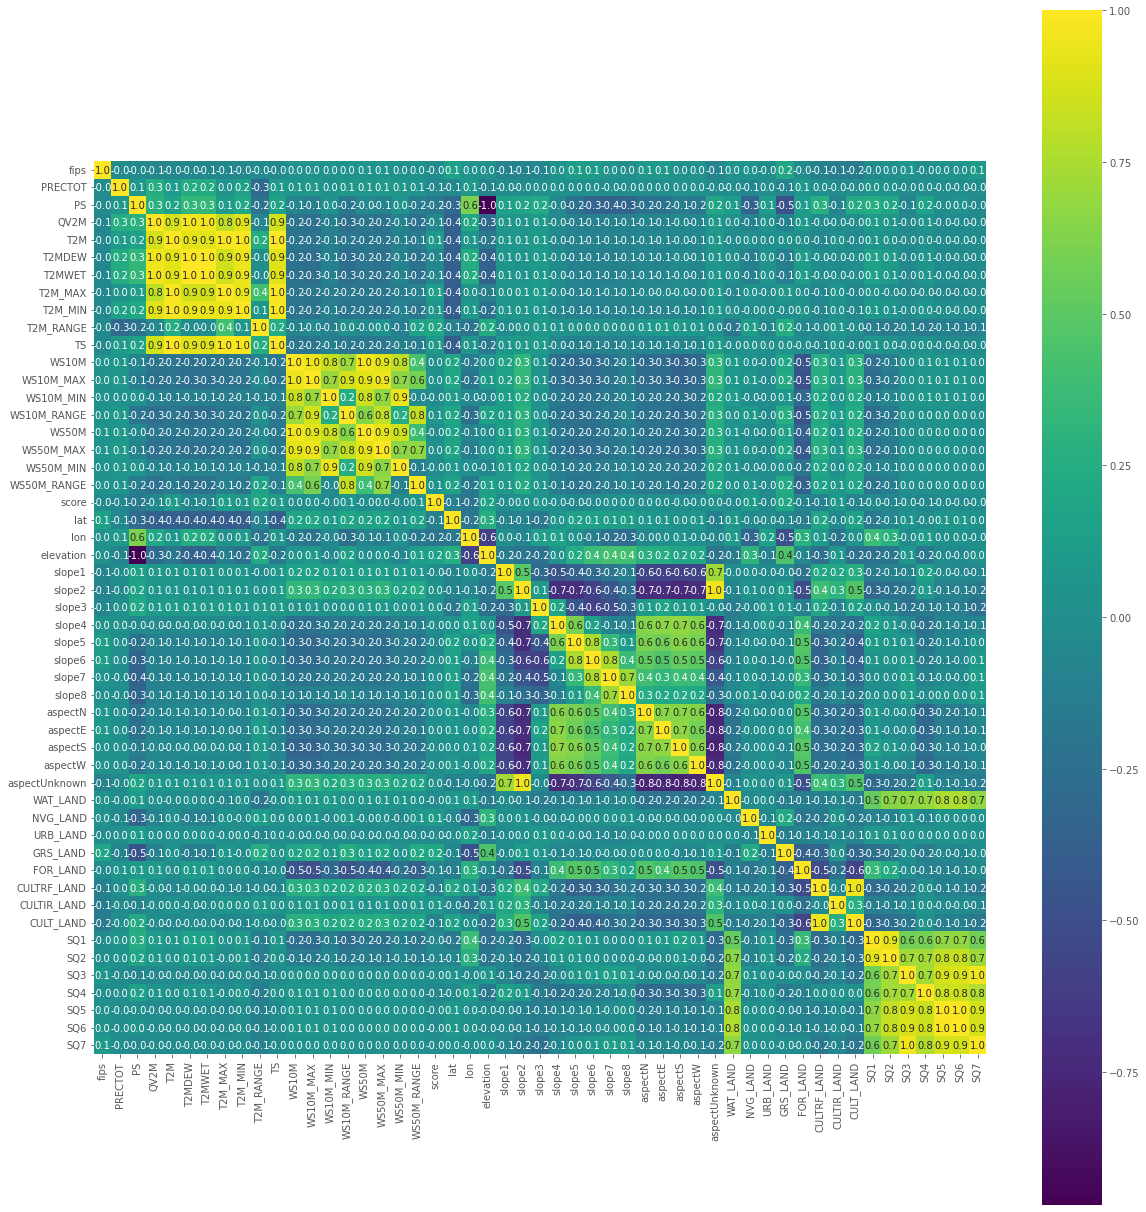

In [85]:
fig, ax = plt.subplots(figsize=(17,17))

sns.heatmap(joined_datap.corr(), cmap="viridis",annot=True, square=True,fmt='.1f')

plt.tight_layout()

As we can see here, there are some strong correlations:
* Temperature features are strongly correlated between each other
* Wind features are strongly correlated between each other
* Slope and aspect features are strongly correlated between each other
* Soil features (SQ) are strongly correlated

Given these informations, we could think about dropping these features to avoid multicollinearity. One alternative is to use PCA before using any mode and let the algorithm "choose" which are the most importants.

Also having a look at the heatmap we can see the there is not any strong liner correlation of the features with the drought levels.

#### Data Exploration Conclusions

After the data exploration we can say that:
1. One of the first steps to perform in a Big Data enviroment, is to filter our dataset to avoid using too many resourcers on our cluster. Also following Occam's razor: with no significant difference in performance, simpler models should be preferred. Therefore we will get rid of the following features:
    * There is a strong correlation between T2M, T2M_MAX, T2M_MIN, TS. We will keep only T2M as it's explicative of the temperature feature.
    * Same with WS10M and WS50M. We will drop WS10M_MAX, WS50M, WS50M_MAX
    * lat/ lon are better and more correlated with score than fips
    * QV2M, TDEW TWET are all faces of the same medal and highly correlated with T2M features, we can drop them.
    * elevation and PS are dedundant.
    * SQ features are highly correlated. We can drop SQ2 and SQ7
    * CULT_LAND and CULTRF_LAND are redundant
    * slope2 and aspectUnknown are redundant
    * Use of PCA to reduce the amount of features in case of linear model
2. Feature skeweness:
    * Linear models might need a normally distribuited data. That implies feature transformation.
    * Another option could be bucketizing our features
    * A robust scaler might be needed before training any model. We will choose this option for semplicity.
5. Feature engineering: 
    * Create week of the year and year feature and remove date: this will help grouping our data
    * Since our target is collected on a weekly basis we might group it accordingly. This will help as well dealing with all the missing targets entries as well.
6. Possible models:
    * Decision Tree
    * Random Forest
    * OneVsRest
7. Imbalanced Target:
    * We are dealing with highly imbalanced data. Even after performing a grouping we'll still have imbalanced target towards 0s
    * Possible solutions are: Undersampling/Oversampling/SMOTE or use a weight feature. We will use the latter.    

## Prepare the Data

In [86]:
columns_to_drop = [
    "T2M_MAX",
    "T2M_MIN",
    "TS",
    "QV2M",
    "T2MDEW",
    "T2MWET",
    "WS10M_MAX",
    "WS50M",
    "WS50M_MAX"
    
]

To speed up our analysis process, let's build functions that we can easly use in the pipeline on our train/test/val datasets.

In [87]:
#https://medium.com/towards-data-science/pyspark-wrap-your-feature-engineering-in-a-pipeline-ee63bdb913
        
class ScoreType(Transformer):
    def __init__(self, inputCol, outputCol='score'):
        self.inputCol = inputCol
        self.outputCol = outputCol
        
    def this():
        this(Identifiable.randomUID("ScoreType"))
    def copy(extra):
            defaultCopy(extra)
    def _transform(self, df):
            return df.withColumn(self.outputCol, F.col(self.inputCol).cast("integer"))
        
class DateType(Transformer):
    def __init__(self, inputCol, outputCol='date'):
        self.inputCol = inputCol
        self.outputCol = outputCol
        
    def this():
        this(Identifiable.randomUID("DateType"))
    def copy(extra):
            defaultCopy(extra)
    def _transform(self, df):
            return df.withColumn(self.outputCol, F.to_date(F.col(self.inputCol)))


class DayOfWeekExtractor(Transformer):
    # Day extractor herit of property of Transformer 
    def __init__(self, inputCol, outputCol='week_day'):
        self.inputCol = inputCol #the name of your columns
        self.outputCol = outputCol #the name of your output column
    def this():
        #define an unique ID
        this(Identifiable.randomUID("dayofweekextractor"))
    def copy(extra):
        defaultCopy(extra)
    def check_input_type(self, schema):
        field = schema[self.inputCol]
        #assert that field is a datetype 
        if (field.dataType != F.DateType()):
            raise Exception('DayExtractor input type %s did not match input type DateType' % field.dataType)
    def _transform(self, df):
#         self.check_input_type(df.schema)
        return df.withColumn(self.outputCol, F.dayofweek(df[self.inputCol]))
    
class WeekOfYearExtractor(Transformer):
    # Day extractor herit of property of Transformer 
    def __init__(self, inputCol, outputCol='week_of_year'):
        self.inputCol = inputCol #the name of your columns
        self.outputCol = outputCol #the name of your output column
    def this():
        #define an unique ID
        this(Identifiable.randomUID("dayofyearextractor"))
    def copy(extra):
        defaultCopy(extra)
    def check_input_type(self, schema):
        field = schema[self.inputCol]
        #assert that field is a datetype 
        if (field.dataType != F.DateType()):
            raise Exception('DayExtractor input type %s did not match input type DateType' % field.dataType)
    def _transform(self, df):
#         self.check_input_type(df.schema)
        return df.withColumn(self.outputCol, F.weekofyear(df[self.inputCol]))
    
class YearExtractor(Transformer):
    def __init__(self, inputCol, outputCol='year'):
        self.inputCol = inputCol
        self.outputCol = outputCol
        
    def this():
        this(Identifiable.randomUID("yearextractor"))
    def copy(extra):
            defaultCopy(extra)
    def check_input_type(self, schema):
            field = schema[self.inputCol]
            if (field.dataType != F.DateType()):
                    raise Exception('YearExtractor input type %s did not match input type DateType' % field.dataType)
    def _transform(self, df):
#             self.check_input_type(df.schema)
            return df.withColumn(self.outputCol, F.year(df[self.inputCol]))

In [88]:
# let' create a copy of our data
train= train_df.alias("train_df")
test = test_df.alias("test_df")
val = val_df.alias("val_df")
soil = soil_data.alias("soil_data")

In [89]:
# dropping the columns not needed
train = train.drop(*columns_to_drop)
test = test.drop(*columns_to_drop)
val = val.drop(*columns_to_drop)

In [90]:
scoretype = ScoreType(inputCol="score")
datetype = DateType(inputCol="date")
dwex = DayOfWeekExtractor(inputCol='date')
yex = YearExtractor(inputCol='date')
dyex = WeekOfYearExtractor(inputCol = "date")

#creating feature transformation pipeline
pipeline_1 =  Pipeline(stages=[ scoretype, datetype, dwex, yex, dyex])
feature_transformation = pipeline_1.fit(train)

#apply transform method
train_transformed= feature_transformation.transform(train)
test_transformed= feature_transformation.transform(test)
val_transformed= feature_transformation.transform(val)

In [91]:
print("train shape:", (train_transformed.count(), len(train_transformed.columns)))
print("test shape:", (test_transformed.count(), len(test_transformed.columns)))
print("valid shape:", (test_transformed.count(), len(test_transformed.columns)))

train shape: (19300680, 15)
test shape: (2271948, 15)
valid shape: (2271948, 15)


In [92]:
train_transformed.printSchema()

root
 |-- fips: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- PRECTOT: double (nullable = true)
 |-- PS: double (nullable = true)
 |-- T2M: double (nullable = true)
 |-- T2M_RANGE: double (nullable = true)
 |-- WS10M: double (nullable = true)
 |-- WS10M_MIN: double (nullable = true)
 |-- WS10M_RANGE: double (nullable = true)
 |-- WS50M_MIN: double (nullable = true)
 |-- WS50M_RANGE: double (nullable = true)
 |-- score: integer (nullable = true)
 |-- week_day: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- week_of_year: integer (nullable = true)



Now let's group our data on a weekly basis:

In [93]:
train_transformed= (train_transformed
.withColumn('week_day',F.when(train_transformed.week_day != 3,0).otherwise(3))
)

test_transformed= (test_transformed
.withColumn('week_day',F.when(test_transformed.week_day != 3,0).otherwise(3))
)

val_transformed= (val_transformed
.withColumn('week_day',F.when(val_transformed.week_day != 3,0).otherwise(3))
)

In [94]:
# we can now drop our date feature
train_transformed = train_transformed.drop("date")
test_transformed = test_transformed.drop("date")
val_transformed = val_transformed.drop("date")

In [95]:
#columns to aggregate
agg_dict = { 
"PRECTOT":"sum",
'PS':"avg",
'T2M':"avg",
'T2M_RANGE':"avg",
'WS10M':"avg",
'WS10M_MIN':"min",
'WS10M_RANGE':"avg",
'WS50M_MIN':"min",
'WS50M_RANGE':"avg",
"score": "max",
"week_day": "max"
}

In [96]:
train_group = (
    train_transformed
    .groupBy("fips","year","week_of_year")
    .agg(agg_dict).where(F.col("max(week_day)")==3)
    .drop("max(week_day)")
)
test_group = test_transformed.groupBy("fips","year","week_of_year").agg(agg_dict).where(F.col("max(week_day)")==3).drop("max(week_day)")
val_group = val_transformed.groupBy("fips","year","week_of_year").agg(agg_dict).where(F.col("max(week_day)")==3).drop("max(week_day)")

In [97]:
print("train shape:", (train_group.count(), len(train_group.columns)))
print("test shape:", (test_group.count(), len(test_group.columns)))
print("valid shape:", (val_group.count(), len(val_group.columns)))

train shape: (2747472, 13)
test shape: (323232, 13)
valid shape: (323232, 13)


As we can see, by grouping our data on a weekly basis we reduced our dataset to 15% of the data.

In [98]:
#count missing data
# train_group.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in train_group.columns]).toPandas().T

In [99]:
# https://stackoverflow.com/questions/29988287/renaming-columns-for-pyspark-dataframe-aggregates#39902691 modified accordingly

# renaming the aggregate columns to make the df more usable
def rename_cols(agg_df, ignore_first_n=1):
    """changes the default spark aggregate names `avg(colname)` 
    to something a bit more useful. Pass an aggregated dataframe
    and the number of aggregation columns to ignore.
    """
    delimiters = "(", ")"
    split_pattern = '|'.join(map(re.escape, delimiters))
    splitter = partial(re.split, split_pattern)
    split_agg = lambda x: '_'.join(splitter(x))[:-1]
    renamed = map(split_agg, agg_df.columns[ignore_first_n:])
    renamed = zip(agg_df.columns[ignore_first_n:], renamed)
    for old, new in renamed:
        if "score" in old:
            agg_df=agg_df.withColumnRenamed(old, "score")
        agg_df = agg_df.withColumnRenamed(old, new)
    return agg_df

train_group = rename_cols(train_group,ignore_first_n=3)
test_group = rename_cols(test_group,ignore_first_n=3)
val_group = rename_cols(val_group,ignore_first_n=3)

Now we will join the soil dataset with our grouped data:

In [100]:
train_join = train_group.join(soil, ["fips"], "left").sort("fips","year","week_of_year").drop("fips")
test_join = test_group.join(soil, ["fips"], "left").sort("fips","year","week_of_year").drop("fips")
val_join = val_group.join(soil, ["fips"], "left").sort("fips","year","week_of_year").drop("fips")

In [101]:
#let's drop the not needed soil features
soil_columns = [
    "elevation",
    "CULTRF_LAND",
    "aspectUnknown",
    "SQ2",
    "SQ7",
    "aspectUnknown"
]

train_join = train_join.drop(*soil_columns)
test_join = test_join.drop(*soil_columns)
val_join = val_join.drop(*soil_columns)

For analysis purposes, we are going to create a new feature "weights" to account for imbalanced data. Let's see our label distribuition at this point:

In [102]:
train_join.groupBy('score').count().orderBy('score').show()

+-----+-------+
|score|  count|
+-----+-------+
|    0|1786990|
|    1| 423331|
|    2| 265530|
|    3| 168869|
|    4|  80946|
|    5|  21806|
+-----+-------+



Let's create now a weight feature for our labels:

In [103]:
# weight solutions https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

n_samples = 2747473
n_classes = 6
zero = 1786990
one = 423331
two = 265530
three = 168869
four = 80946
five = 21806

def weights(row):
    if row == 0:
        return n_samples/(n_classes*zero)
    elif row == 1:
        return n_samples/(n_classes*one)
    elif row == 2:
        return n_samples/(n_classes*two)
    elif row ==3:
        return n_samples/(n_classes*three)
    elif row == 4:
        return n_samples/(n_classes*four)
    elif row ==5:
        return n_samples/(n_classes*five)

weights_udf = F.udf(lambda x: weights(x), FloatType())


train_weight = train_join.withColumn("weights", weights_udf("score"))
test_weight = test_join.withColumn("weights", weights_udf("score"))
val_weight = val_join.withColumn("weights", weights_udf("score"))

To proceed with our study, we need to vectorize our features and then apply our desired transormations. To achieve this we will use another pipeline:

In [104]:
assembler_columns = [
'year',
'week_of_year',
'sum_PRECTOT',
'avg_T2M_RANGE',
'min_WS50M_MIN',
'avg_WS10M',
'avg_WS50M_RANGE',
'avg_T2M',
'avg_WS10M_RANGE',
'avg_PS',
'min_WS10M_MIN',
'lat',
'lon',
'slope1',
'slope2',
'slope3',
'slope4',
'slope5',
'slope6',
'slope7',
'slope8',
'aspectN',
'aspectE',
'aspectS',
'aspectW',
'WAT_LAND',
'NVG_LAND',
'URB_LAND',
'GRS_LAND',
'FOR_LAND',
'CULTIR_LAND',
'CULT_LAND',
'SQ1',
'SQ3',
'SQ4',
'SQ5',
'SQ6']

cols_robust = [
    'sum_PRECTOT',
    'avg_PS',
]


In [105]:
#building the pipeline stages
stages = []
assemblerInputs = train_weight.columns

#add vector assembler fro robust scaled
assemblerInputsRobust = [column for column in assemblerInputs if column in assembler_columns]
assembler_robust = ft.VectorAssembler(inputCols=assemblerInputsRobust, outputCol="robust_vc", handleInvalid="skip")
stages += [assembler_robust]

#Robust scaler
col_scaler_robust = ft.RobustScaler(inputCol=assembler_robust.getOutputCol(), outputCol='scaled_features_robust', relativeError=0.05, lower=0.2,upper=0.8) #NB CHANGED TO STANDARD FOR TEST
stages += [col_scaler_robust]

In [106]:
pipeline_2 = Pipeline(stages = stages)
assemblerModel = pipeline_2.fit(train_weight)

In [107]:
train_vectorized = assemblerModel.transform(train_weight)
test_vectorized = assemblerModel.transform(test_weight)
val_vectorized = assemblerModel.transform(val_weight)
train_vectorized.cache()
train_vectorized.show(2) # calling action to chahe the dataframe

+----+------------+------------------+------------------+-----+-------------+------------------+-----------------+-----------------+------------------+------------------+-------------+---------+---------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+---+---+---+---+---+---------+--------------------+----------------------+
|year|week_of_year|       sum_PRECTOT|     avg_T2M_RANGE|score|min_WS50M_MIN|         avg_WS10M|  avg_WS50M_RANGE|          avg_T2M|   avg_WS10M_RANGE|            avg_PS|min_WS10M_MIN|      lat|      lon|slope1|slope2|slope3|slope4|slope5|slope6|slope7|slope8|aspectN|aspectE|aspectS|aspectW|         WAT_LAND|        NVG_LAND|        URB_LAND|        GRS_LAND|        FOR_LAND|     CULTIR_LAND|       CULT_LAND|SQ1|SQ3|SQ4|SQ5|SQ6|  weights|           robust_vc|scaled_features_robust|
+----+------------+-------

## Shortlisting Promising Models

Only few models support multiclass classification, here we will use Decision Tree, Random Forest and One vs Rest with Logistic Regression.

In [108]:
def get_metrics(model_preditions):
    """
    Thus function creates a resumen for multiclass classification problems with a confusion matrix
    """
    predictions = model_preditions.withColumn('prediction', F.col('prediction').cast("float")).withColumn('score', F.col('score').cast("float"))
    columns = ["prediction","score"]
    predictionAndLabels = predictions.select(*[columns]).rdd
    metrics = MulticlassMetrics(predictionAndLabels)

    # Statistics by class
    # labels = predictionAndLabels.map(lambda lp: lp.score).distinct().collect()
    labels= [0.0,1.0,2.0,3.0,4.0,5.0]
    for label in sorted(labels):
        print("Class %s precision = %s" % (label, metrics.precision(label)))
        print("Class %s recall = %s" % (label, metrics.recall(label)))
        print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))

    # Weighted stats
    print("Weighted recall = %s" % metrics.weightedRecall)
    print("Weighted precision = %s" % metrics.weightedPrecision)
    print("Weighted F(1) Score = %s" % metrics.weightedFMeasure())
    print("Weighted F(0.5) Score = %s" % metrics.weightedFMeasure(beta=0.5))
    print("Weighted false positive rate = %s" % metrics.weightedFalsePositiveRate)
    
    #confusion matrix
    fig, ax = plt.subplots(figsize=(10,10))

    sns.heatmap(metrics.confusionMatrix().toArray(), annot=True, square=True, cmap="viridis")


#### Decition Tree Classifier

In [109]:
dc = DecisionTreeClassifier(
    featuresCol="scaled_features_robust",
    labelCol='score',
    weightCol="weights",
    seed=0)

dc_model = dc.fit(train_vectorized)

In [110]:
dc_predictions = dc_model.transform(test_vectorized)

Class 0.0 precision = 0.8909822962278952
Class 0.0 recall = 0.6817670701038604
Class 0.0 F1 Measure = 0.7724592393643579
Class 1.0 precision = 0.18396751391186644
Class 1.0 recall = 0.17745024081703709
Class 1.0 F1 Measure = 0.18065011593389552
Class 2.0 precision = 0.02320363098577184
Class 2.0 recall = 0.027314203385760596
Class 2.0 F1 Measure = 0.025091681142636556
Class 3.0 precision = 0.12041988512576748
Class 3.0 recall = 0.18181818181818182
Class 3.0 F1 Measure = 0.14488264029548434
Class 4.0 precision = 0.020604395604395604
Class 4.0 recall = 0.3065917220235054
Class 4.0 F1 Measure = 0.03861376580751038
Class 5.0 precision = 0.00036994686217797806
Class 5.0 recall = 0.04888888888888889
Class 5.0 F1 Measure = 0.0007343369271337495
Weighted recall = 0.581207924957925
Weighted precision = 0.74903884004631
Weighted F(1) Score = 0.6528734680843377
Weighted F(0.5) Score = 0.7071833562252507
Weighted false positive rate = 0.31250374577652174


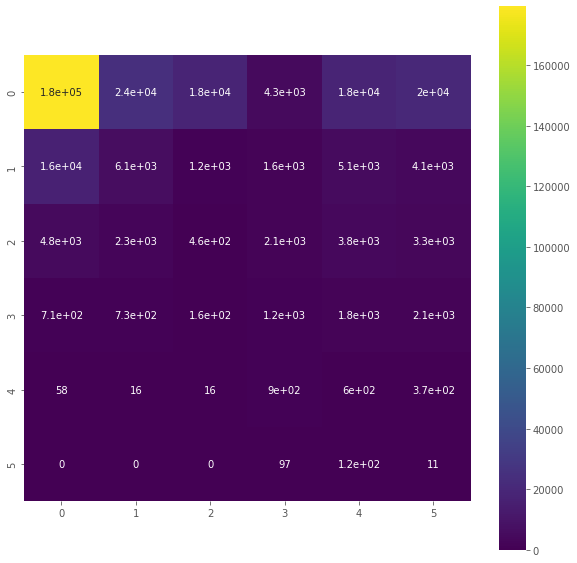

In [111]:
get_metrics(dc_predictions)

#### Random Froest

In [112]:
rf = RandomForestClassifier(
    featuresCol="scaled_features_robust",
    labelCol='score',
    weightCol="weights",
    seed=0
)

rf_model = rf.fit(train_vectorized)

In [113]:
rf_predictions = rf_model.transform(test_vectorized)

Class 0.0 precision = 0.8995628893554461
Class 0.0 recall = 0.6950136378486389
Class 0.0 F1 Measure = 0.7841686686568701
Class 1.0 precision = 0.176876832116063
Class 1.0 recall = 0.10329019903673185
Class 1.0 F1 Measure = 0.1304196508709908
Class 2.0 precision = 0.12094395280235988
Class 2.0 recall = 0.002461279865530076
Class 2.0 F1 Measure = 0.0048243807730776024
Class 3.0 precision = 0.04294032023289665
Class 3.0 recall = 0.035287081339712915
Class 3.0 F1 Measure = 0.038739330269205514
Class 4.0 precision = 0.013374092472296522
Class 4.0 recall = 0.03576903423607562
Class 4.0 F1 Measure = 0.019468780419969405
Class 5.0 precision = 0.0023912920873047205
Class 5.0 recall = 0.9422222222222222
Class 5.0 F1 Measure = 0.00477047704770477
Weighted recall = 0.5787576725076726
Weighted precision = 0.7586623636615447
Weighted F(1) Score = 0.6536997036902062
Weighted F(0.5) Score = 0.7099138251475418
Weighted false positive rate = 0.2840872904913035


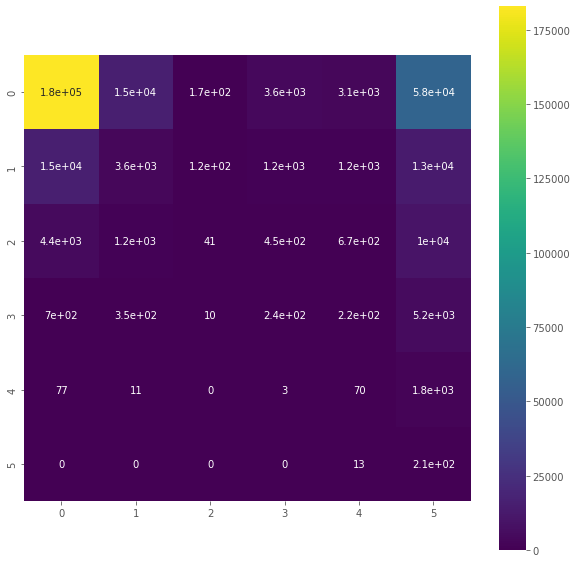

In [114]:
get_metrics(rf_predictions)

#### One vs Rest with Logistic Regression

Reduction of Multiclass Classification to Binary Classification. Performs reduction using one against
all strategy. For a multiclass classification with k classes, train k models (one per class). Each example
is scored against all k models and the model with highest score is picked to label the example. [[16]](#references)

Here for the One Vs Rest model we will use a different strategy. Since it is very expensive computationaly, we will downsample our model so that all the classes have the same amout of entries. Also, as we are going to use Logistic Regression, we will use PCA for future reduction a speed up the evaluation, since this model favor a smaller dimension dataset.

We didn't do this for the tree model because they would have suffered more from the data amout reduction.

In [115]:
#Let's visualize class imbalance
target = train_weight.groupBy("score").count()
tot = int(train_weight.count())

plot_data_dist = target.withColumn("percentage",(F.col("count")/tot)*100).sort(target.score.desc()).toPandas()
plot_data_dist

score    count  percentage
0      5    21806    0.793675
1      4    80946    2.946199
2      3   168869    6.146341
3      2   265530    9.664521
4      1   423331   15.408019
5      0  1786990   65.041245

In [116]:
#let's apply downsampling sampling
train_sampled = train_weight.sampleBy("score", fractions={5: 1, 4: 0.26, 3: 0.13, 2: 0.082, 1: 0.051, 0: 0.012}, seed=0) #weights

In [117]:
target = train_sampled.groupBy("score").count()
tot = int(train_sampled.count())

plot_data_dist = target.withColumn("percentage",(F.col("count")/tot)*100).sort(target.score.desc()).toPandas()
plot_data_dist

score  count  percentage
0      5  21806   16.823540
1      4  20941   16.156184
2      3  22089   17.041878
3      2  21754   16.783422
4      1  21256   16.399210
5      0  21437   16.538853

In [118]:
# vectorizing and scaling features
assemblerModel = pipeline_2.fit(train_sampled)

In [119]:
train_sampled_vectorized = assemblerModel.transform(train_sampled) 
test_sampled_vectorized = assemblerModel.transform(test_weight)
val_sampled_vectorized = assemblerModel.transform(val_weight)

In [120]:
#pca
pca = PCA(k=3,inputCol="scaled_features_robust", outputCol="pcaFeatures")
pca_model = pca.fit(train_sampled_vectorized)


In [121]:
pca_model.explainedVariance

DenseVector([0.9294, 0.0481, 0.0144])

As we can see 3 features are explaining more than 90% of the variance of the data.

In [122]:
train_pca = pca_model.transform(train_sampled_vectorized)
test_pca = pca_model.transform(test_sampled_vectorized)
train_pca.cache()
train_pca.show(2)

+----+------------+-----------+------------------+-----+-------------+------------------+------------------+------------------+------------------+------------------+-------------+---------+---------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+---+---+---+---+---+---------+--------------------+----------------------+--------------------+
|year|week_of_year|sum_PRECTOT|     avg_T2M_RANGE|score|min_WS50M_MIN|         avg_WS10M|   avg_WS50M_RANGE|           avg_T2M|   avg_WS10M_RANGE|            avg_PS|min_WS10M_MIN|      lat|      lon|slope1|slope2|slope3|slope4|slope5|slope6|slope7|slope8|aspectN|aspectE|aspectS|aspectW|         WAT_LAND|        NVG_LAND|        URB_LAND|        GRS_LAND|        FOR_LAND|     CULTIR_LAND|       CULT_LAND|SQ1|SQ3|SQ4|SQ5|SQ6|  weights|           robust_vc|scaled_features_robust|         pcaFeat

Since we balanced out or dataset, here we don't need the weights column.

In [123]:
lr = LogisticRegression(maxIter=10)

ovr = OneVsRest(
    classifier=lr,
    featuresCol="pcaFeatures",
    labelCol="score",
)

ovr_model = ovr.fit(train_pca)

In [124]:
ovr_predictions = ovr_model.transform(test_pca)

Class 0.0 precision = 0.8474617341787488
Class 0.0 recall = 0.7174344129646936
Class 0.0 F1 Measure = 0.7770460843429263
Class 1.0 precision = 0.09658762290341237
Class 1.0 recall = 0.02422677421226716
Class 1.0 F1 Measure = 0.03873721324024031
Class 2.0 precision = 0.048733361957921856
Class 2.0 recall = 0.027254172169528156
Class 2.0 F1 Measure = 0.034958034958034956
Class 3.0 precision = 0.04003836010549029
Class 3.0 recall = 0.24970095693779903
Class 3.0 F1 Measure = 0.06901111616182487
Class 4.0 precision = 0.0
Class 4.0 recall = 0.0
Class 4.0 F1 Measure = 0.0
Class 5.0 precision = 0.000687757909215956
Class 5.0 recall = 0.12444444444444444
Class 5.0 F1 Measure = 0.0013679556391528445
Weighted recall = 0.5935148747648747
Weighted precision = 0.7038067166436016
Weighted F(1) Score = 0.6401821571596915
Weighted F(0.5) Score = 0.675638551907115
Weighted false positive rate = 0.46851924733209926


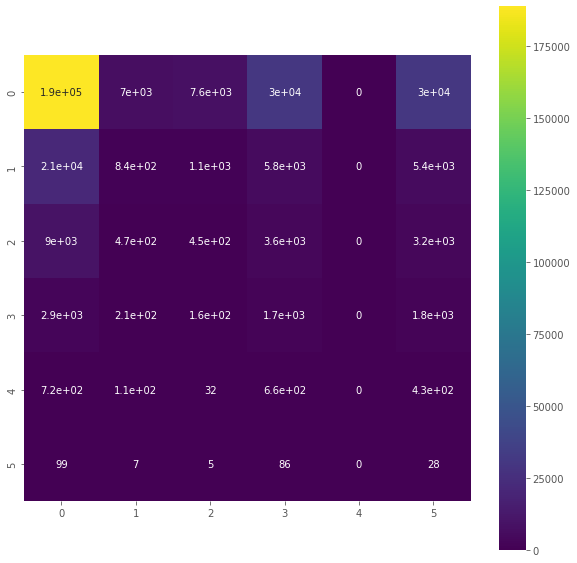

In [125]:
get_metrics(ovr_predictions)

## Validation

Class 0.0 precision = 0.8117768101384331
Class 0.0 recall = 0.6875219393338702
Class 0.0 F1 Measure = 0.7445005433494474
Class 1.0 precision = 0.22071498530852104
Class 1.0 recall = 0.09329331401366177
Class 1.0 F1 Measure = 0.1311508802560745
Class 2.0 precision = 0.042735042735042736
Class 2.0 recall = 0.000713436385255648
Class 2.0 F1 Measure = 0.001403443113772455
Class 3.0 precision = 0.051950419248997445
Class 3.0 recall = 0.032638570774163995
Class 3.0 F1 Measure = 0.04009002672668448
Class 4.0 precision = 0.0324585635359116
Class 4.0 recall = 0.06929598230740877
Class 4.0 F1 Measure = 0.0442092886537331
Class 5.0 precision = 0.003228728717102971
Class 5.0 recall = 0.9055374592833876
Class 5.0 F1 Measure = 0.006434514923214017
Weighted recall = 0.5313613751113752
Weighted precision = 0.6455784800644774
Weighted F(1) Score = 0.5788859760035096
Weighted F(0.5) Score = 0.6146086420645958
Weighted false positive rate = 0.36619151012070233


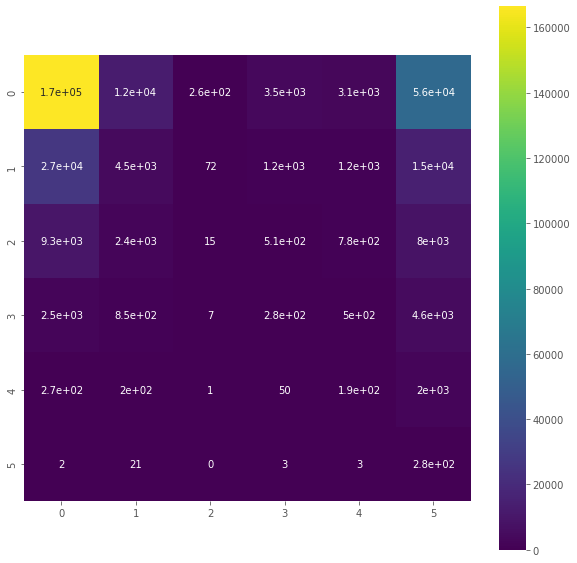

In [127]:
val_predictions = rf_model.transform(val_vectorized)
get_metrics(val_predictions)

**Please note**: The following fine tuning code is commented out due to the excessive time to run it. It improved the validation score by ~4%, confirming that there still some margin to improve.

## Fine Tune the System

So far our best model is Random Forest. Let's perform hyperparameter tuning:

```python
# let's reduce the dataframe
columns = ["score","weights", "scaled_features_robust"]
train_vectorized_red = train_vectorized.select(*columns).alias("train_vectorized_red")
# train = train_vectorized_red.repartition(2) #optimzie in memory partition
train_vectorized_red.cache()
train_vectorized_red.show(5)

# building the grid search parameters
grid = (ParamGridBuilder()
                .addGrid(rf.maxDepth, [15, 20])
                .addGrid(rf.numTrees, [20, 50])
             .build())

#evaluator
evaluator = MulticlassClassificationEvaluator(
    predictionCol="prediction",
    labelCol="score",
    metricName="f1"
)
```

In this case, instead of Cross validation, we will use Train Test split. TrainValidationSplit only evaluates each combination of parameters once, as opposed to k times in the case of CrossValidator. It is, therefore, less expensive, but will not produce as reliable results when the training dataset is not sufficiently large. [[17]](#references)

```python
#TrainValidationSplit
tvs = TrainValidationSplit(estimator=rf,
                           estimatorParamMaps=grid,
                           evaluator=evaluator,
                           # 85% of the data will be used for training, 15% for validation.
                           trainRatio=0.85,
                           parallelism=2, #threadpool amount
                           seed=0
                          )

# # cross validation
# cv = CrossValidator(
#     estimator=rf,
#     estimatorParamMaps=grid,
#     evaluator=evaluator,
#     parallelism=6,
#     seed=0
# )

#fitting the model
cvModel = tvs.fit(train_vectorized_red)

#evaluating predictions
cv_predictions = cvModel.transform(test_vectorized)
                                   
get_metrics(cv_predictions)

#checking the best parameters 
cvModel.bestModel

#NB only valid for cross validation
# cv_predictions = [
#  (
#  [
#  {key.name: paramValue} 
#  for key, paramValue 
#  in zip(
#  params.keys(), 
#  params.values())
#  ], metric
#  ) 
#  for params, metric 
#  in zip(
#  cvModel.getEstimatorParamMaps(), 
#  cvModel.avgMetrics
#  )
# ]

# sorted(cv_predictions, 
#  key=lambda el: el[1], 
#  reverse=True)[0]

print("Best Depth: ", cvModel.bestModel._java_obj.getMaxDepth())
print("Best numTrees: ", cvModel.bestModel._java_obj.getNumTrees())
```

## Validation

```python
cv_validation = cvModel.transform(val_vectorized)

get_metrics(cv_validation)
```

## Conclusions

We started by analysing feature by feature our dataset. We noticed how some key predictors like the total precipitations, or the surface pressure were highly skewed. We decided to assess the skewness of the data but to not directly remove outliers and implemented instead a robust scaler in our transformation pipeline. Furthermore, we didn’t seek to normalize the distribution of our features, something that is considered beneficial especially for linear models, because that would have influenced excessively the interpretation of our data. We then removed highly correlated features that could have caused multicollinearity problems and decided to add new features relative to the soil status, exploring our they were correlated to the various drought levels. It is important to underline how none of the features was strongly linearly correlated with our target, but nonetheless that could not exclude any nonlinear correlation.
Moreover, during our exploration we noticed how our data was highly imbalanced towards Nan values and discovered that the reason was that the target was being collected on a weekly basis. Thus, we decided to group our entries on a yearly and weekly basis per each county code and although now we didn’t have any null value and with a dataset strongly reduced in its size, that didn’t keep away the fact that the target was still imbalanced towards dry soil label. 
To solve this problem we followed two different strategies according to the different modles we were dealing with:
*	When dealing with tree models we used a weight features to take in account the imbalanced data. 
*	When dealing with a logistic regression model, we decided to opt for a down sampled dataset where all the labels where balanced, drastically reducing the dataset size. Moreover, unlike tree models, linear models are highly influenced by the amount of features so we implemented a feature reduction trough the use of PCA showing as well that only 3 features where explaining more than 90% of the variance of the data.

In the end, the better performing model was Random Forest, and we decided to perform an hyperparameter optimization trough cross validation tanking into account the best trade off between tree depth and the amount of trees. Please note that only few parameters have been choosen due to the high processin time. Ideally 3 values per hyperparameyer are advisable.

At the end, after the validation task, we can see how the f1-score is ~57%, with a weighted false positive rate of ~36%. All in all, we consider the result of our analysis positive, since we managed to have an average prediction probability superior to the one of a toss of a coin.  Nonetheless, it is important to note that most of the models performed badly on classifying all the classes but the 0 class. To solve this problem, one solution could be perhaps grouping all the classes > 0 to a single class 1, reducing the problem to a binary class problem. Other areas where we could seek improvement are the ones involving different models (eg. XGBoost) or transforming our feature more aggressively performing capping for the features with the most outliers or trying to normalizing the features with some transformations (eg. log, sqrt, etc). We can then resume our possible future improvements as follows:
* Choosing different models and possibly nearual networks for multiclass classification
* Reducing the problem to a binary class problem
* Performing a stricter outlier managment with the aim of improving the input features
* Improve feature engineering creating new features from the combination of others (eg. days of rain/quarter) since drought levels are higly influenced by long time periods of no rain
* Gather more data from stream jets or sea temperature

## References

[1] STELLA LEVANTESI, 2022, 14 July. Italy must prepare for a future of chronic drought. Nature Italy.

[2] France drought: Parched towns left short of drinking water. BBC News.[05/08/, 2022]

[3] FT REPORTERS, 2022, AUGUST 5. Europe battles water shortages as severe drought sweeps the continent. Financial Times.

[4] U.S. Drought Monitor. Available: https://droughtmonitor.unl.edu/.

[5] Measuring Drought. Available: https://drought.unl.edu/ranchplan/DroughtBasics/WeatherandDrought/MeasuringDrought.aspx [07/08/, 2022].

[6] What is a drought and what causes it?. Available: https://gpm.nasa.gov/resources/faq/what-drought-and-what-causes-it#:~:text=Droughts%20are%20caused%20by%20low,factors%20that%20contribute%20to%20drought [07/08/, 2022].

[7] RICHARD RESTUCCIA, , 5 Causes Of Drought . Available: https://jainsusa.com/blog/drought/ [08/-8/, 2022].

[8] RINKESH, , Causes, Effects and Solutions to Drought . Available: https://www.conserve-energy-future.com/causes-effects-solutions-drought.php [08/08/, 2022].

[9] WIKIPEDIA, c-last update, Skin temperature (of an atmosphere) . Available: https://en.wikipedia.org/wiki/Skin_temperature_(of_an_atmosphere)#:~:text=The%20skin%20temperature%20is%20a,tropopause%20temperature%20of%20209%20K. [08/08/, 2022].

[10] ESA, , Land Surface Temperature. Available: https://climate.esa.int/en/projects/land-surface-temperature/ [08/08/, 2022].

[11] BBC, , Droughts. Available: https://www.bbc.co.uk/bitesize/guides/ztvvmnb/revision/1 [08/08/, 2022].

[12] WIKIPEDIA, b-last update, Humidity . Available: https://en.wikipedia.org/wiki/Humidity [08/08/, 2022].

[13] WIKIPEDIA, a-last update, Dew point . Available: https://en.wikipedia.org/wiki/Dew_point [08/08/, 2022].

[14] WIKIPEDIA, d-last update, Wet-bulb temperature. Available: https://en.wikipedia.org/wiki/Wet-bulb_temperature [08/08/, 2022]. 

[15] MADHU, , Difference Between Dewpoint and Wet Bulb Temperature. Available: https://www.differencebetween.com/difference-between-dewpoint-and-wet-bulb-temperature/#:~:text=The%20key%20difference%20between%20dewpoint,is%20exposed%20to%20air%20flow [08/08/, 2022].

[16] WENQIANG FENG, 2021. Learning Apache Spark with Python.

[17] Apache Spark, 2022. ML Tuning: model selection and hyperparameter tuning. Available: https://spark.apache.org/docs/latest/ml-tuning.html#train-validation-split

REBECCA LINDSEY and LUANN DAHLMAN, JUNE 28, 2022-last update, Climate Change: Global Temperature. Available: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature [08/08/, 2022].









In [ ]:
# spark.stop()